In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import os

#Load the dataset and inspect its structure
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ks-projects-201801.csv", low_memory=False)
print(df.shape)
np.random.seed(0)
print(df.info())
df.head()

Mounted at /content/drive
(378661, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), obje

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

In [2]:
#Identify null values
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [3]:
#Handle invalid values
invalid_goal_rows = df[(df['goal'] < 0) ]
if not invalid_goal_rows.empty:
    print("Invalid values found in the 'goal' column:")
    print(invalid_goal_rows[['goal']])

# Drop null values in name
df.dropna(subset=['name', 'category', 'main_category', 'state'], inplace=True)

# Fill null values in usd pledged with median
df["usd pledged"] = df["usd pledged"].fillna(df["usd pledged"].median())
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [4]:
# Identify and remove duplicate records.
duplicates = df[df.duplicated()]
print("Duplicate rows found:")
print(duplicates)

df = df.drop_duplicates()

Duplicate rows found:
Empty DataFrame
Columns: [ID, name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd pledged, usd_pledged_real, usd_goal_real]
Index: []


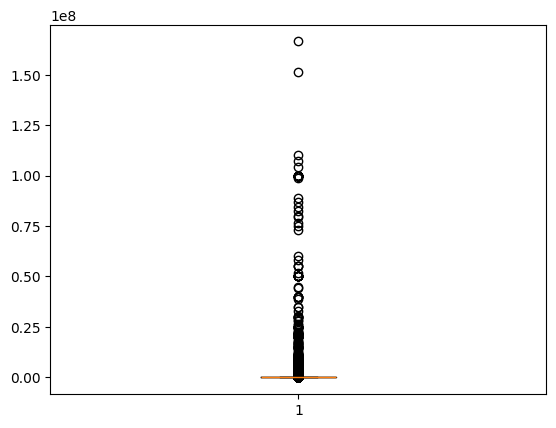

In [5]:
# Check for Outliers
import matplotlib.pyplot as plt

#1. IQR
Q1 = df["usd_goal_real"].quantile(0.25)
Q3 = df["usd_goal_real"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

plt.boxplot(df["usd_goal_real"])
plt.show()

#2. Z-score
import scipy.stats
z = np.abs(scipy.stats.zscore(df["usd_goal_real"]))

In [6]:
# Drop outliers
df = df[(z < 3)]

In [7]:
# Scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
columns_to_scale = ['usd_pledged_real', 'usd_goal_real', 'pledged']

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])
print(df[columns_to_scale].head())

   usd_pledged_real  usd_goal_real       pledged
0      0.000000e+00       0.000438  0.000000e+00
1      1.190325e-04       0.008571  1.190325e-04
2      1.081666e-05       0.012857  1.081666e-05
3      4.916666e-08       0.001429  4.916666e-08
4      6.308082e-05       0.005571  6.308082e-05


###Univariate Analysis

In [8]:
numeric_cols = df.select_dtypes(include=[np.number])

# Univariate Analysis
print("\nSummary Statistics:")
print(numeric_cols.describe())

# Additional statistics
print("\nMedian:")
print(numeric_cols.median())
print("\nMode:")
print(numeric_cols.mode().iloc[0])
print("\nVariance:")
print(numeric_cols.var())
print("\nSkewness:")
print(numeric_cols.skew())
print("\nKurtosis:")
print(numeric_cols.kurtosis())


Summary Statistics:
                 ID          goal        pledged        backers   usd pledged  \
count  3.782850e+05  3.782850e+05  378285.000000  378285.000000  3.782850e+05   
mean   1.074721e+09  2.655747e+04       0.000476     105.706066  6.972504e+03   
std    6.190798e+08  1.649655e+05       0.004704     907.620898  7.827274e+04   
min    5.971000e+03  1.000000e-02       0.000000       0.000000  0.000000e+00   
25%    5.381914e+08  2.000000e+03       0.000001       2.000000  1.954000e+01   
50%    1.075332e+09  5.100000e+03       0.000031      12.000000  3.947650e+02   
75%    1.610109e+09  1.600000e+04       0.000201      56.000000  3.001000e+03   
max    2.147476e+09  4.000000e+07       1.000000  219382.000000  2.033899e+07   

       usd_pledged_real  usd_goal_real  
count     378285.000000  378285.000000  
mean           0.000446       0.006832  
std            0.004475       0.029441  
min            0.000000       0.000000  
25%            0.000002       0.000571  
50%

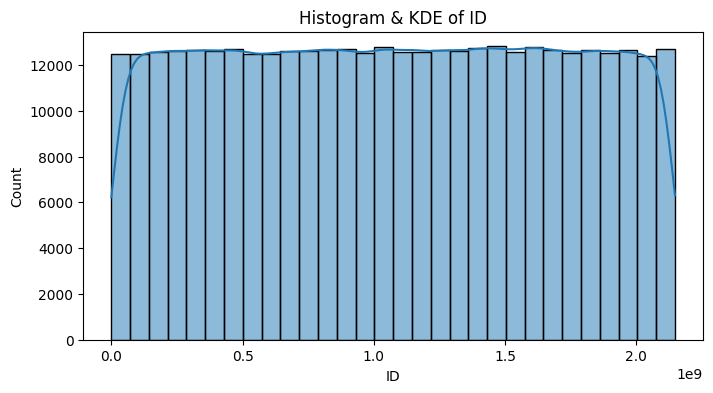

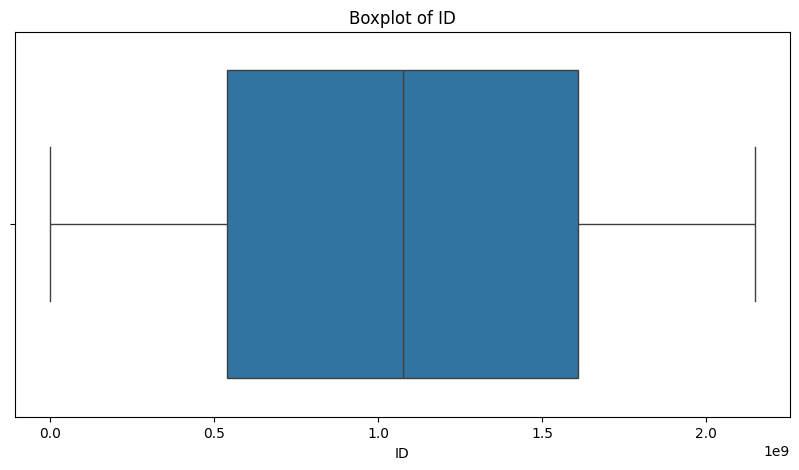

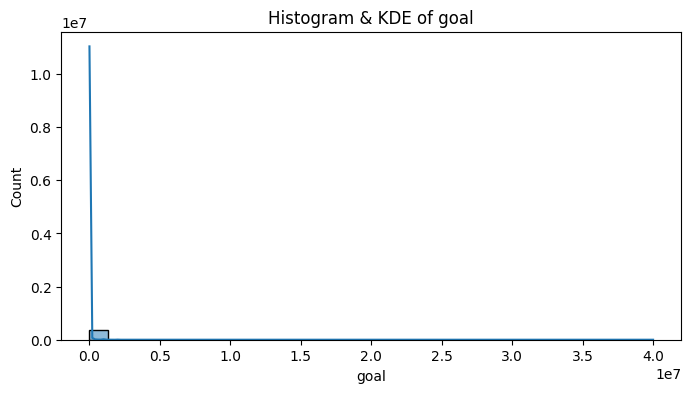

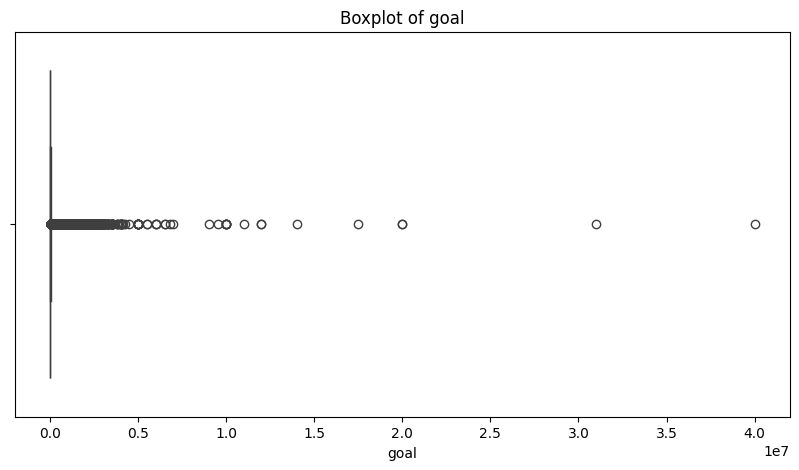

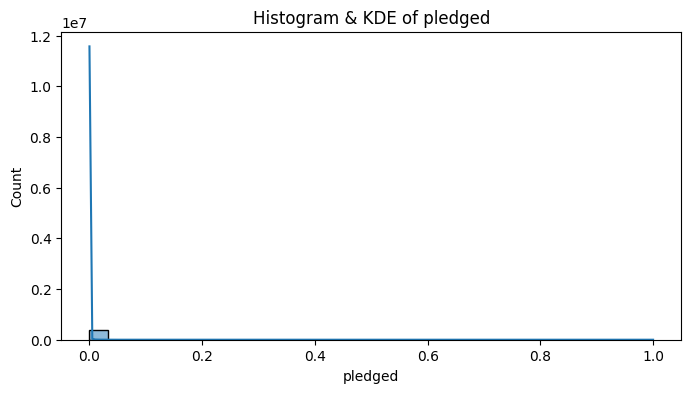

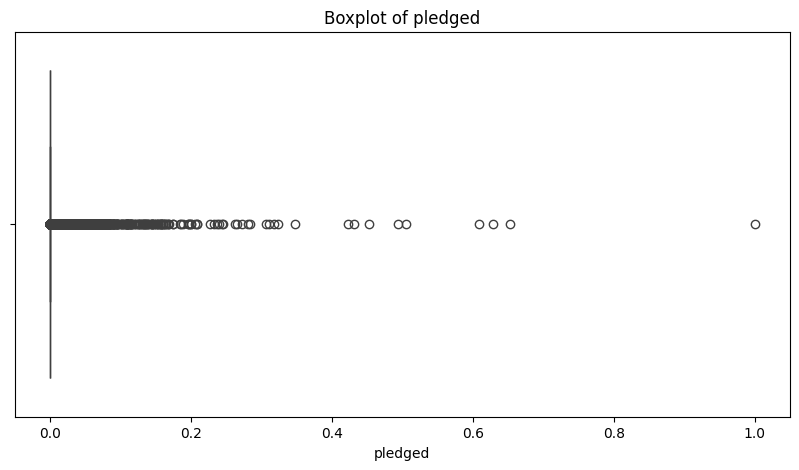

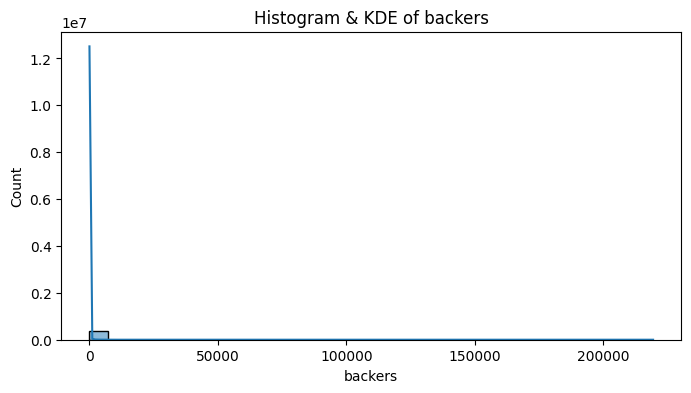

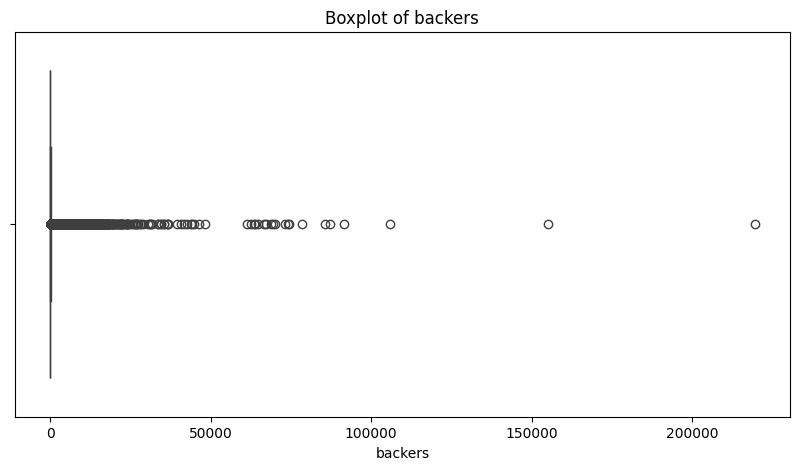

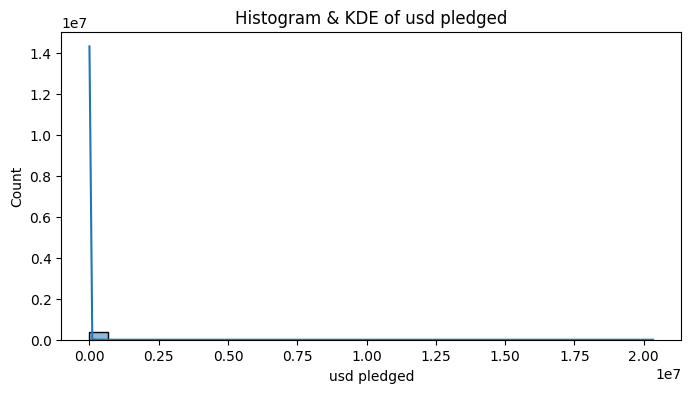

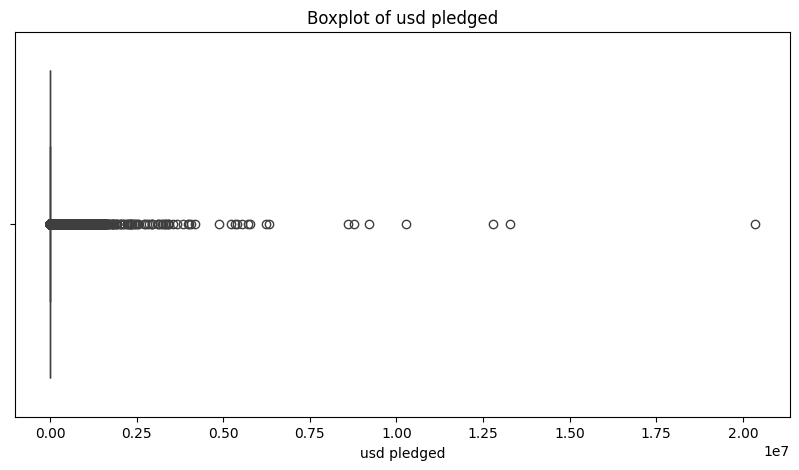

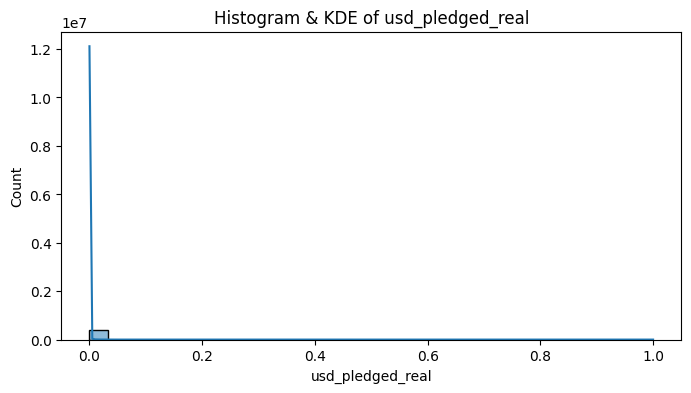

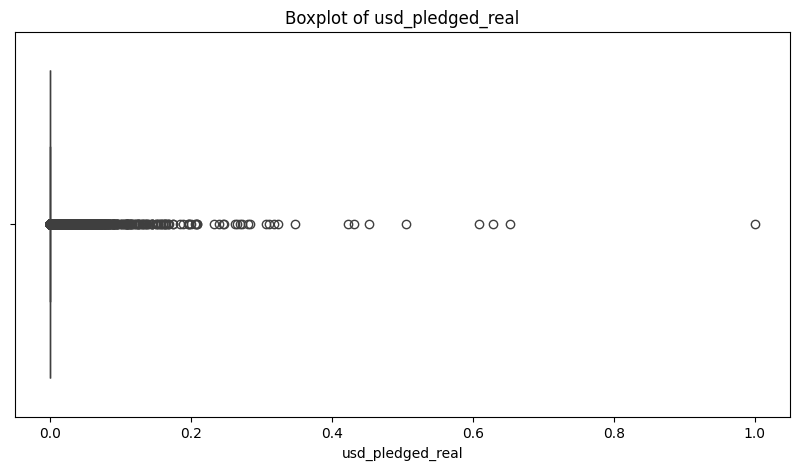

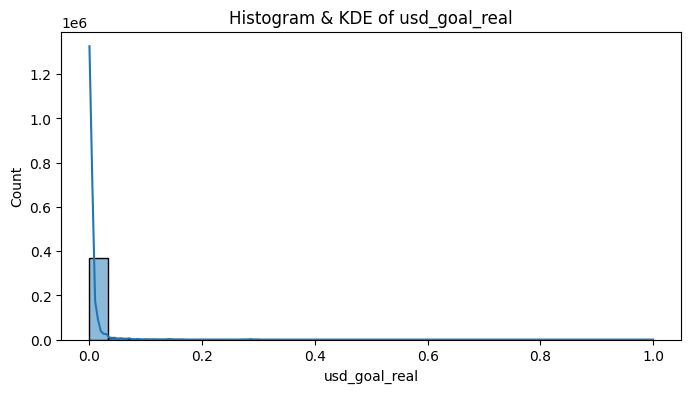

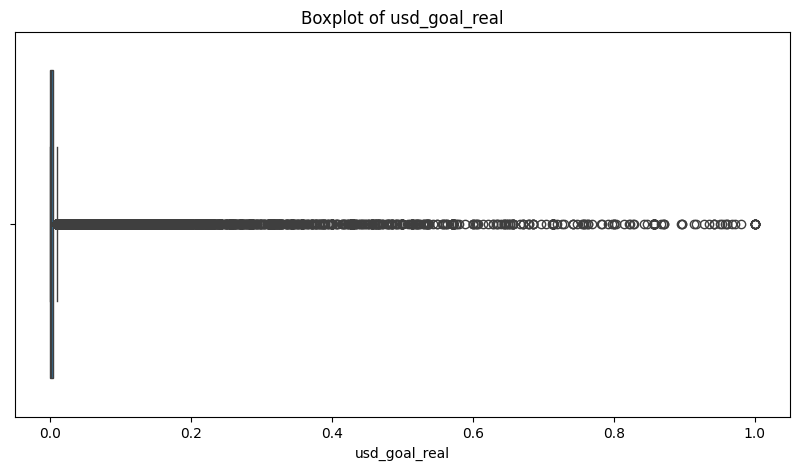

In [9]:
# Histograms, KDE plots, and Boxplots for numerical columns
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram & KDE of {col}")
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

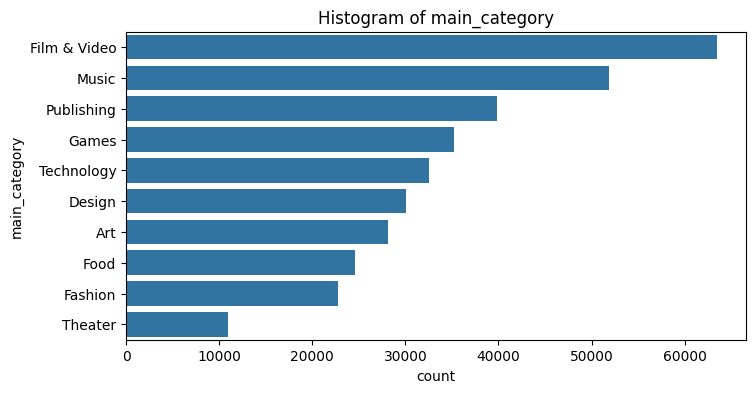

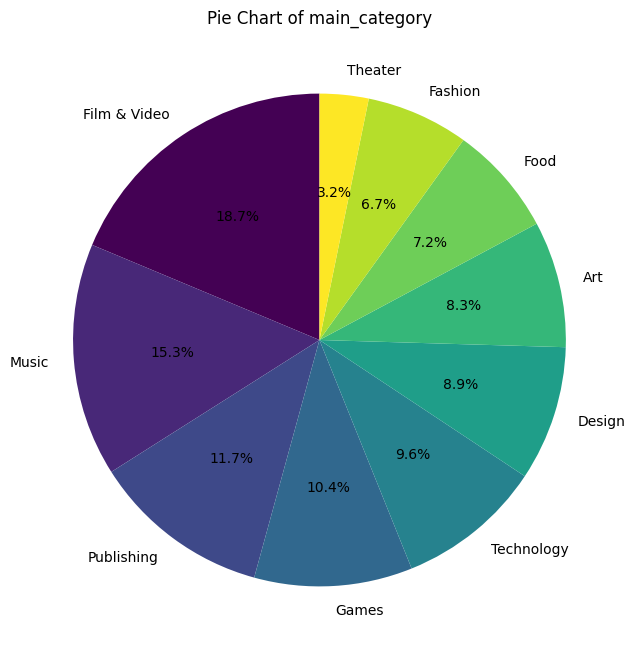

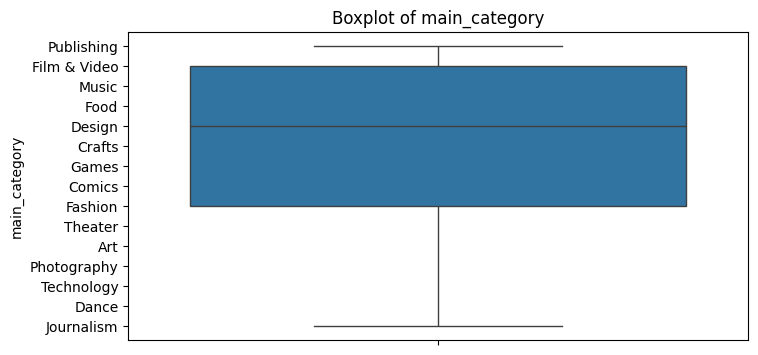

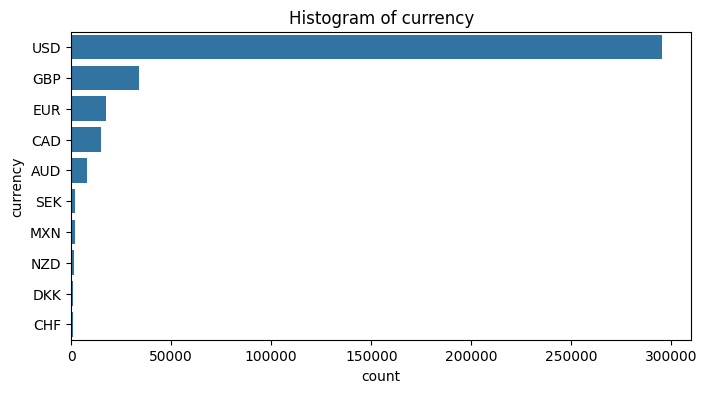

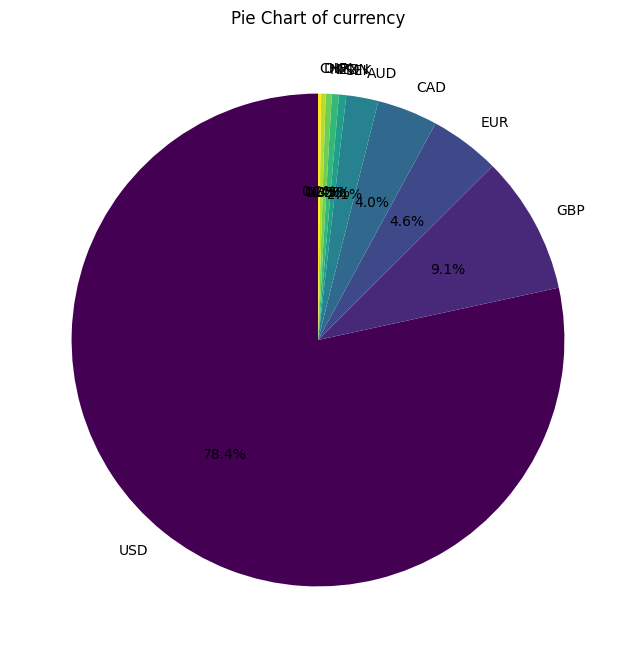

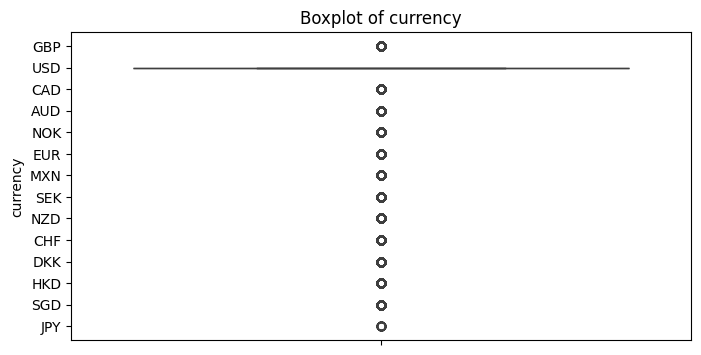

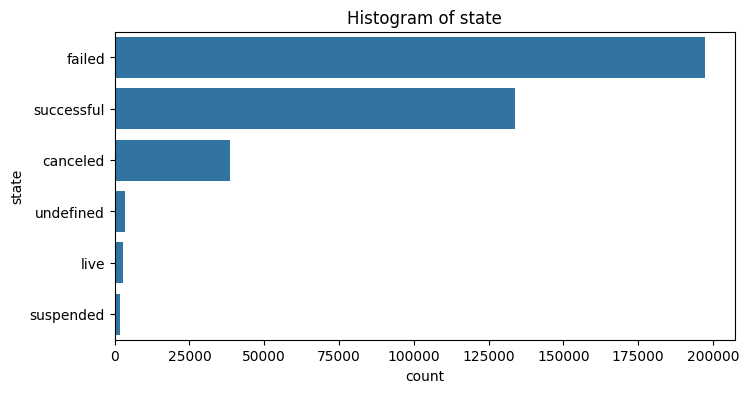

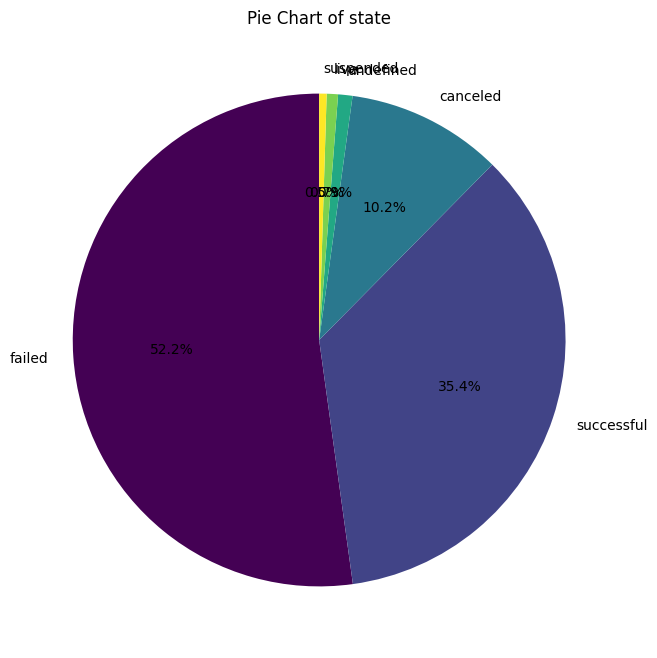

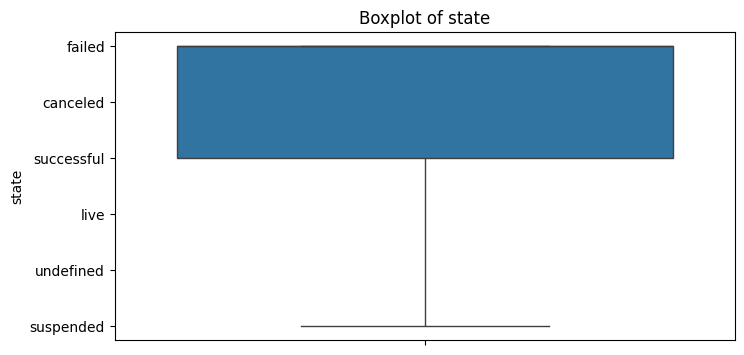

In [10]:
# Pie charts, count plots, and Boxplots for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    # Skip if too many unique values
    if df[col].nunique() > 20:
        continue

    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Limit to top 10 categories
    plt.title(f"Histogram of {col}")
    plt.show()

    plt.figure(figsize=(8, 8))
    df[col].value_counts().nlargest(10).plot.pie(autopct="%1.1f%%", startangle=90, cmap='viridis')  # Top 10 only
    plt.title(f"Pie Chart of {col}")
    plt.ylabel('')
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


###Bivariate Analysis

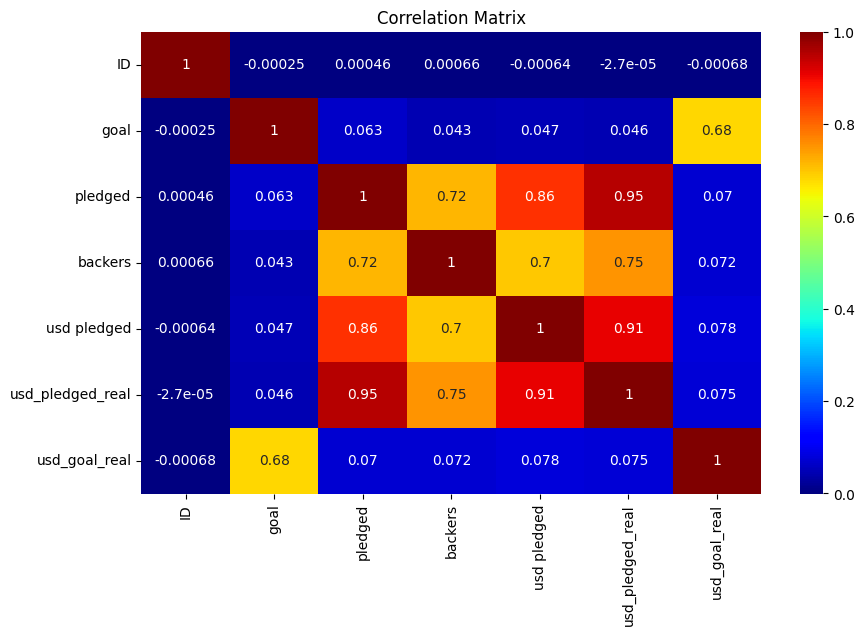

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='jet')
plt.title("Correlation Matrix")
plt.show()

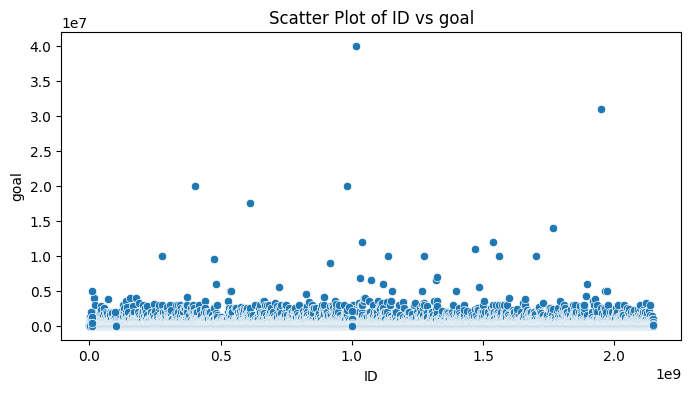

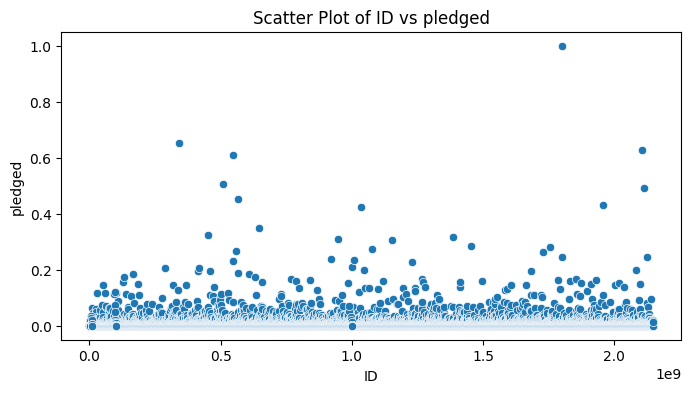

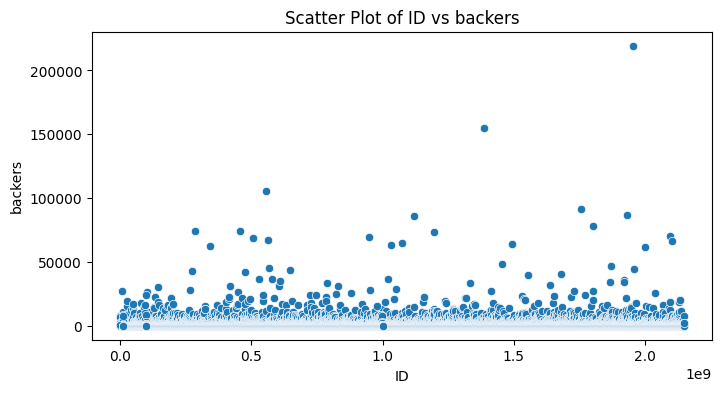

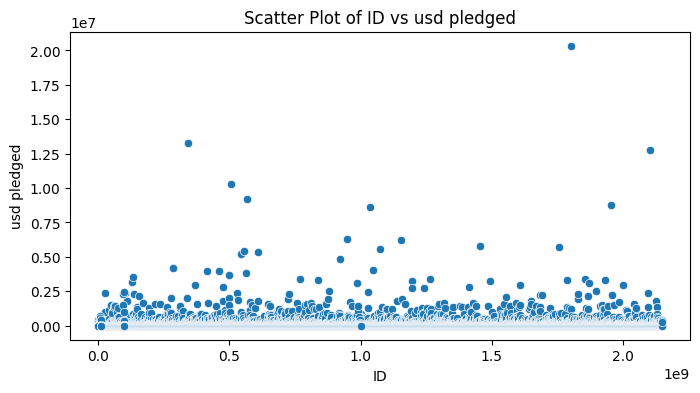

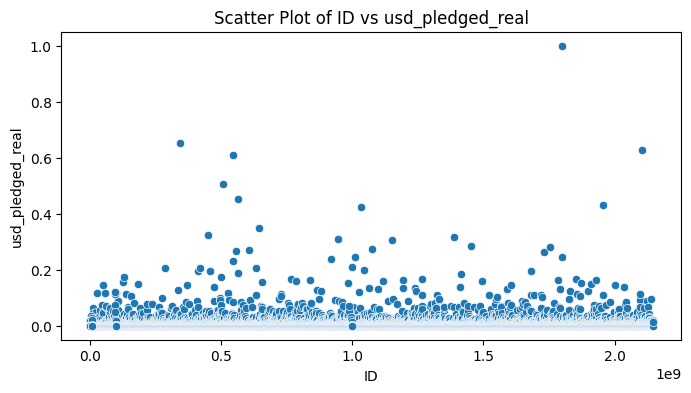

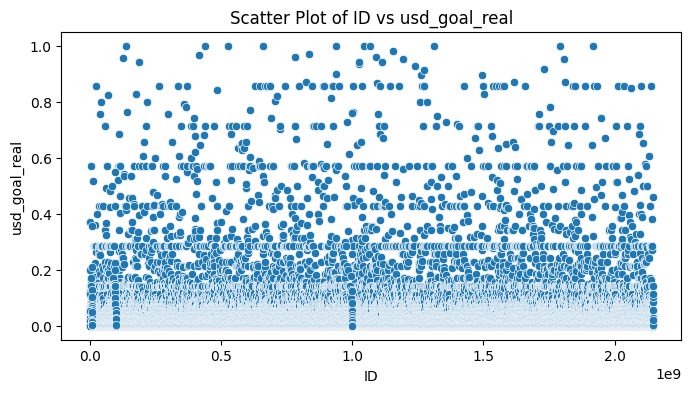

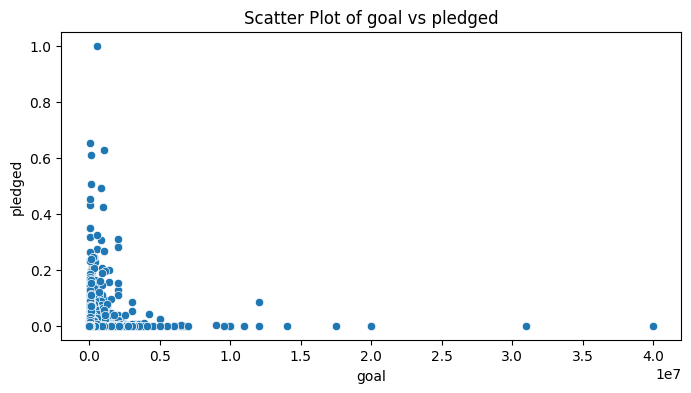

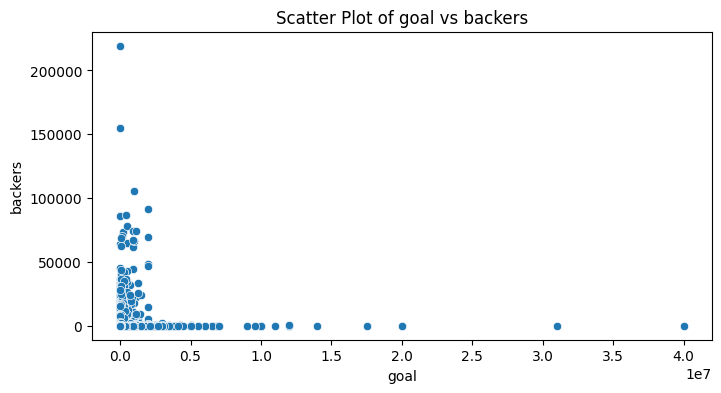

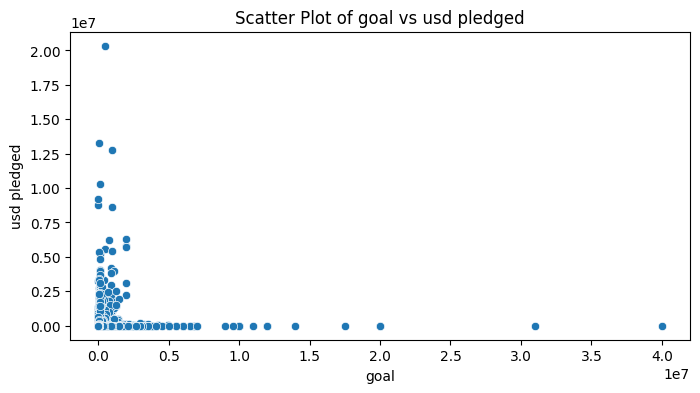

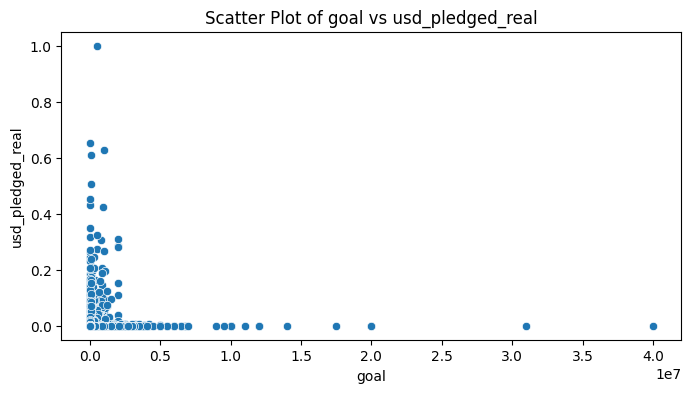

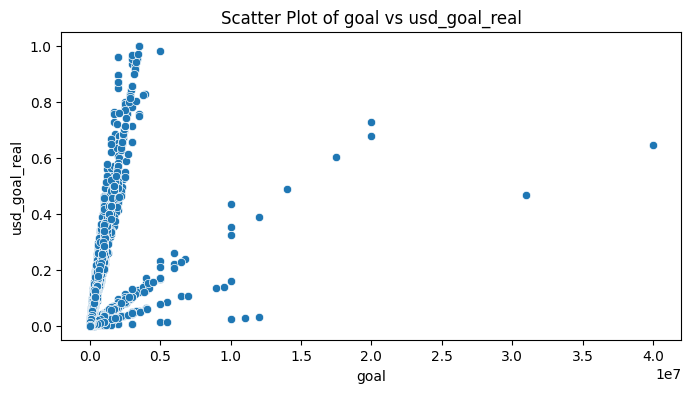

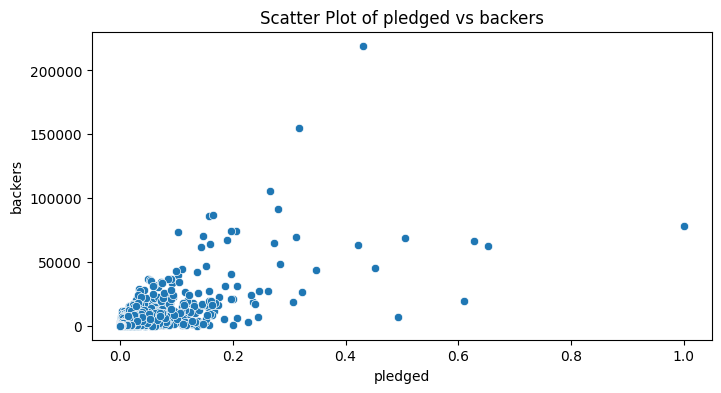

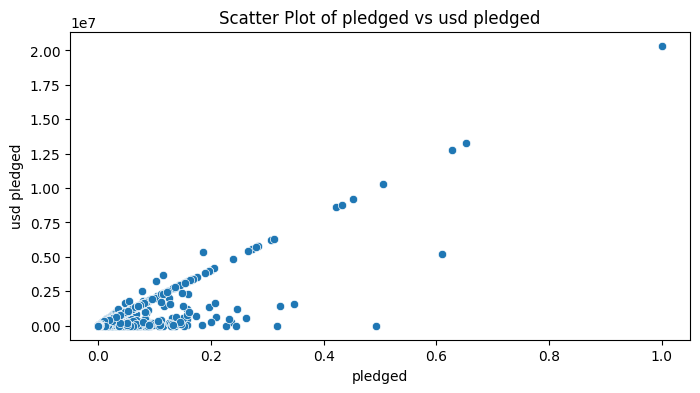

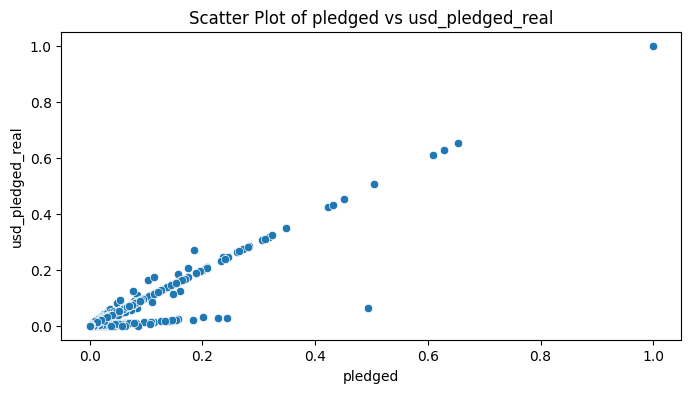

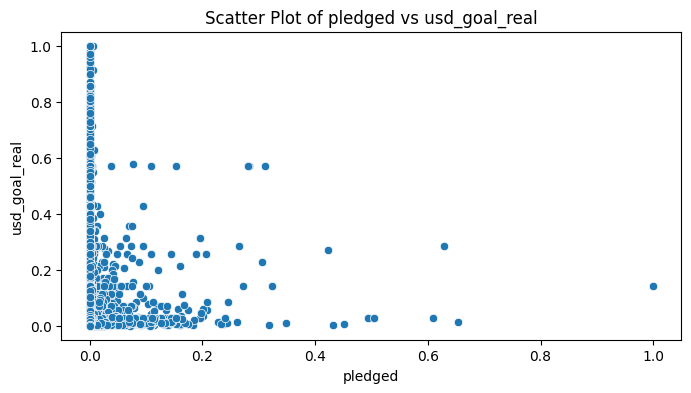

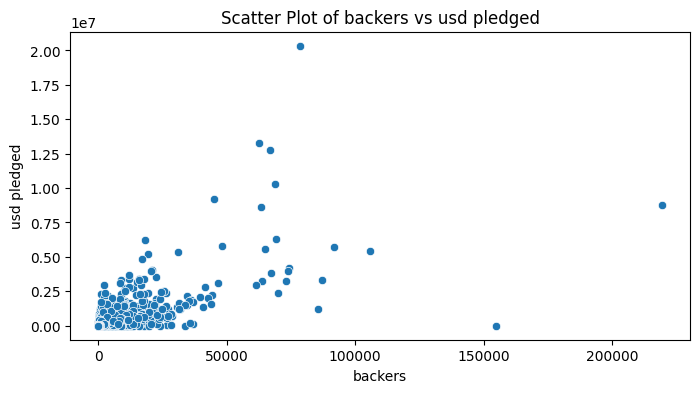

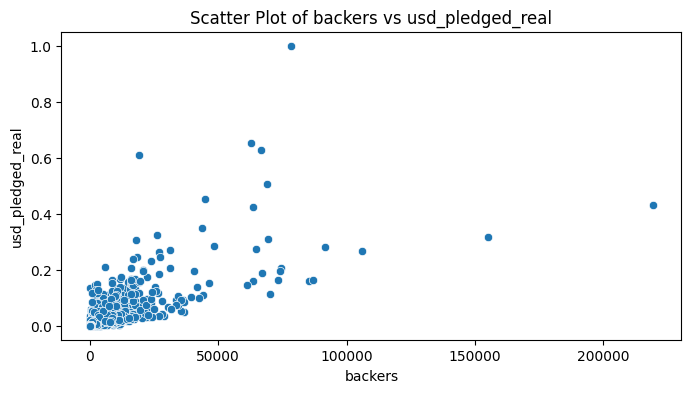

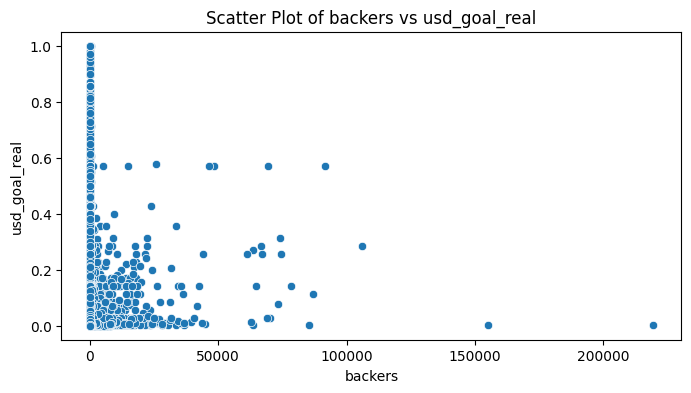

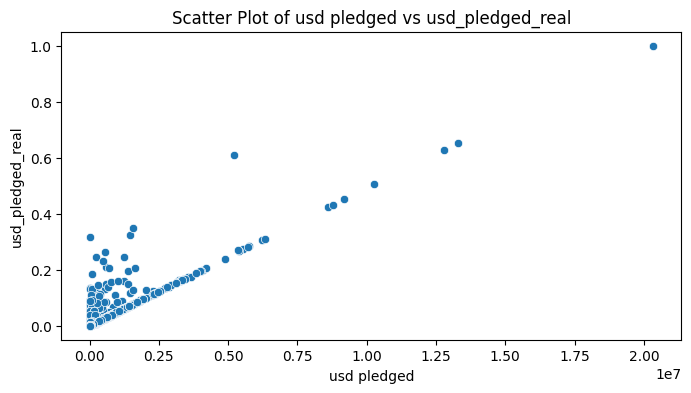

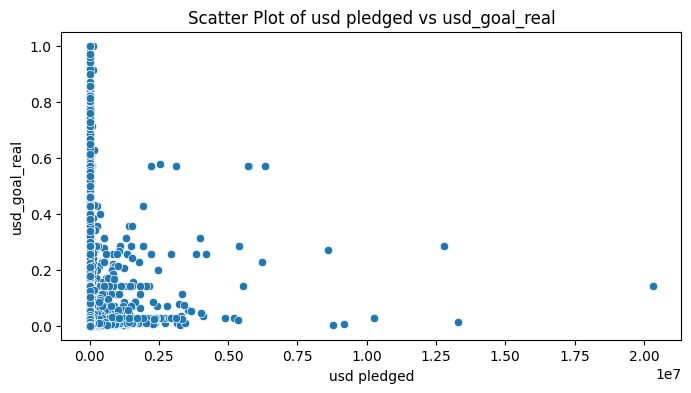

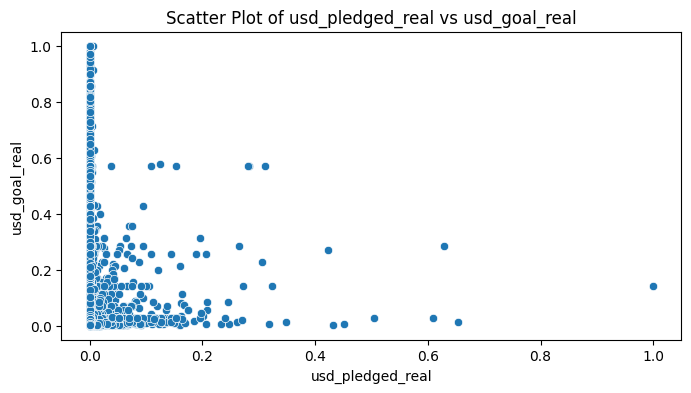

In [12]:
# Scatter plots for numerical column pairs
num_cols = df.select_dtypes(include=['number']).columns
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df[num_cols[i]], y=df[num_cols[j]])
        plt.title(f"Scatter Plot of {num_cols[i]} vs {num_cols[j]}")
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.show()

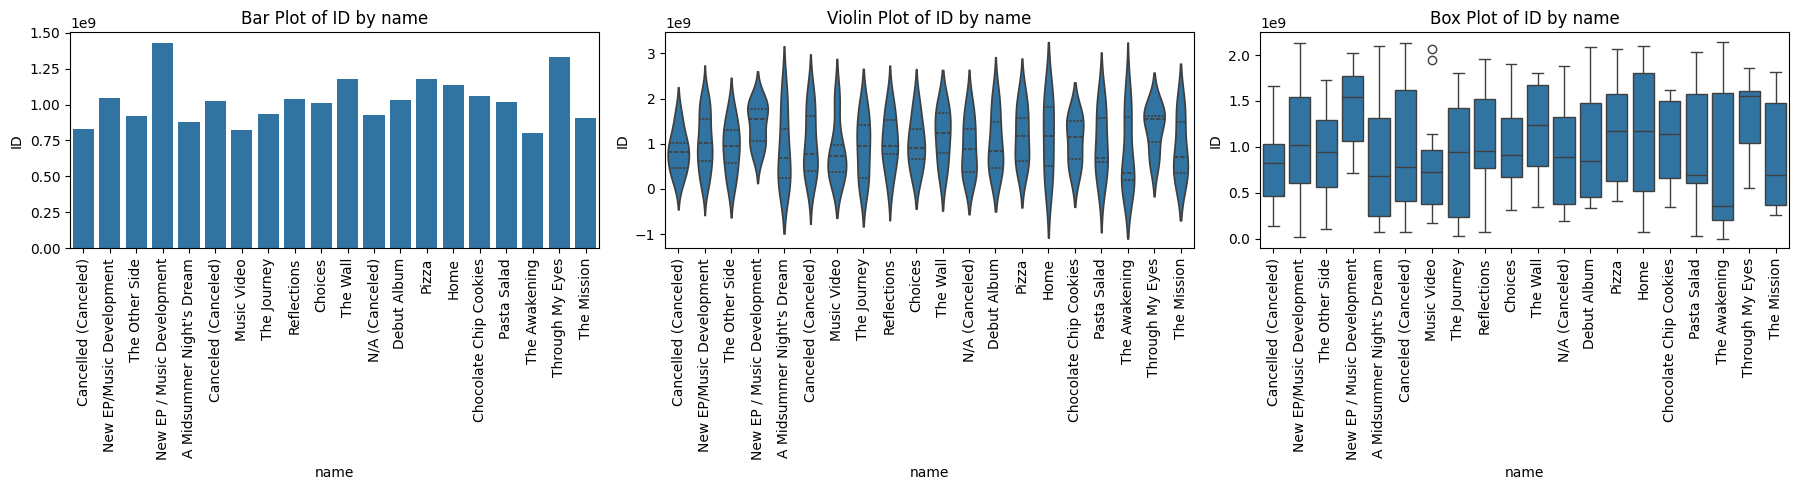

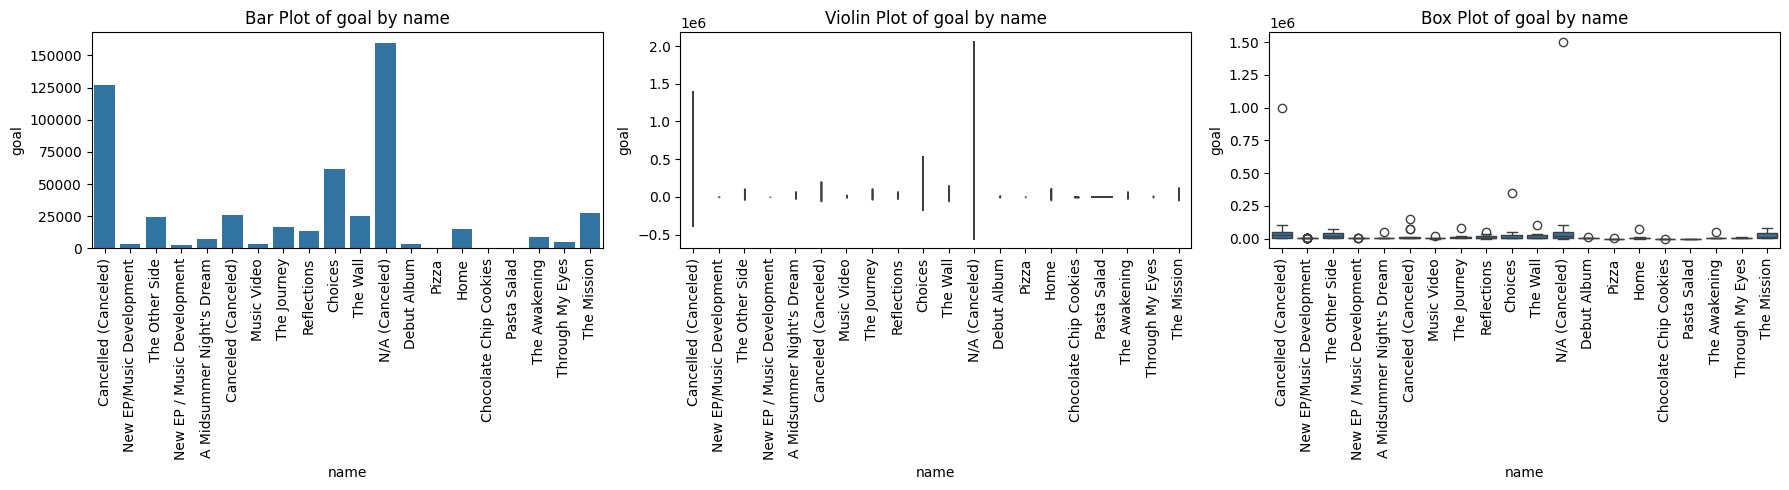

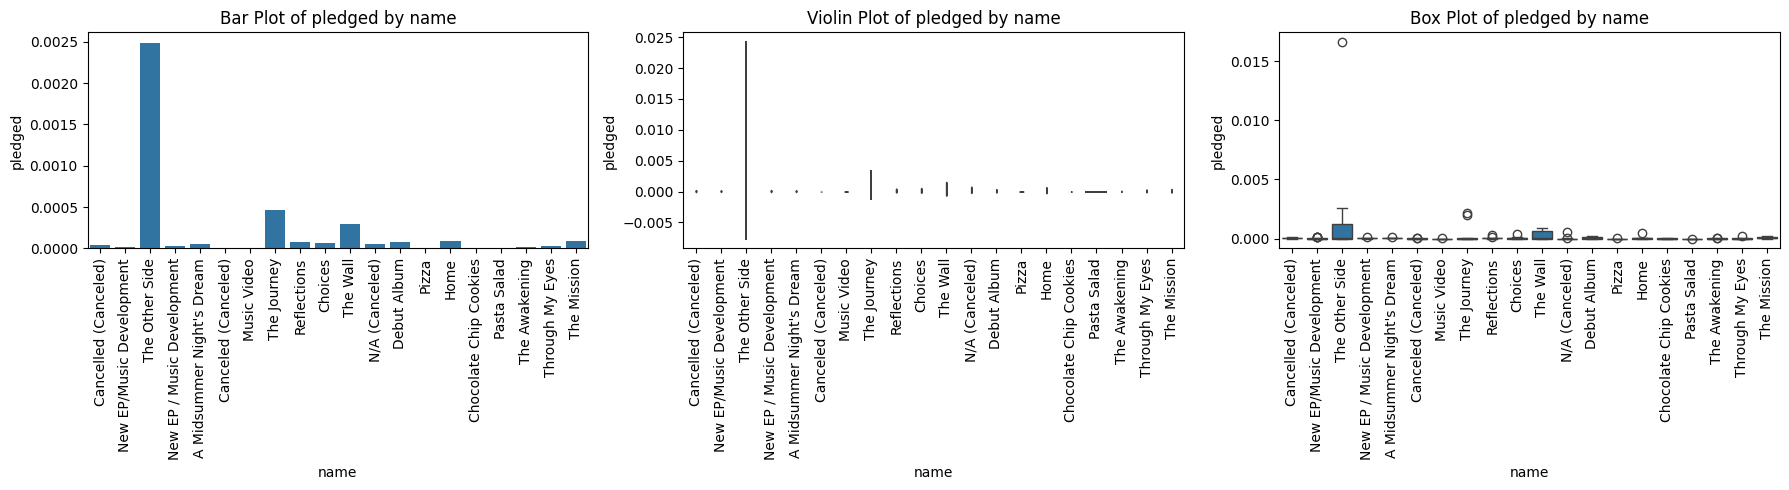

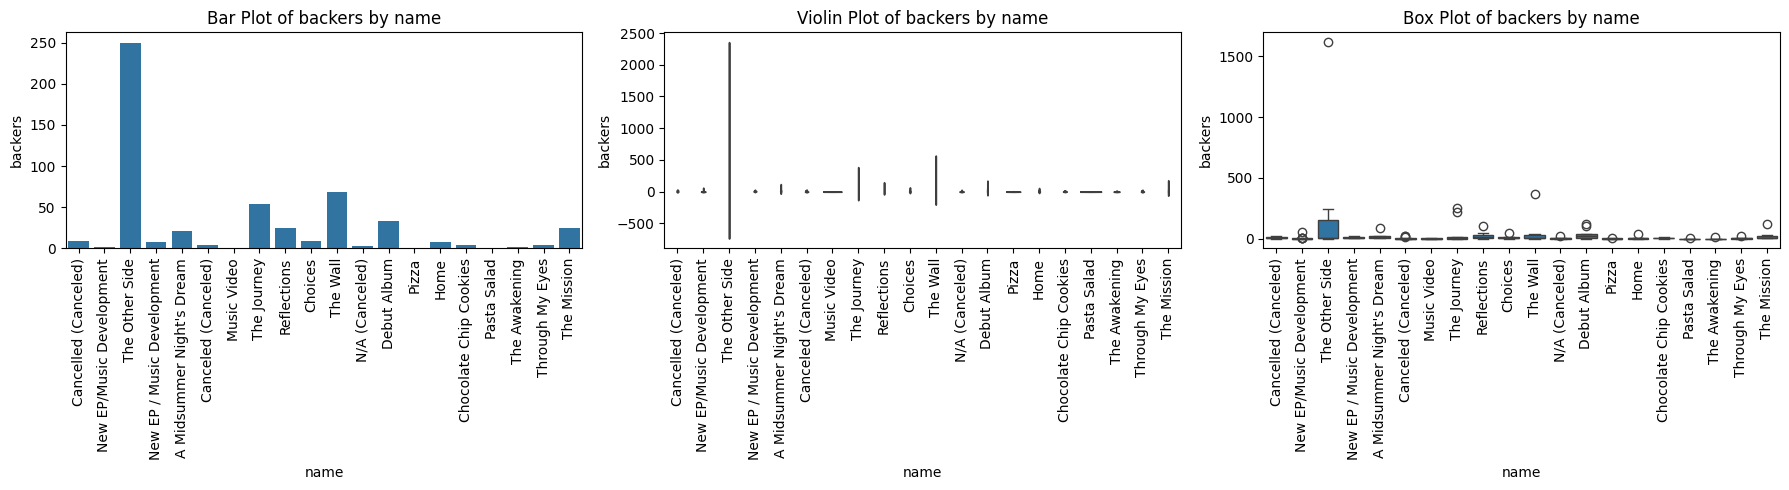

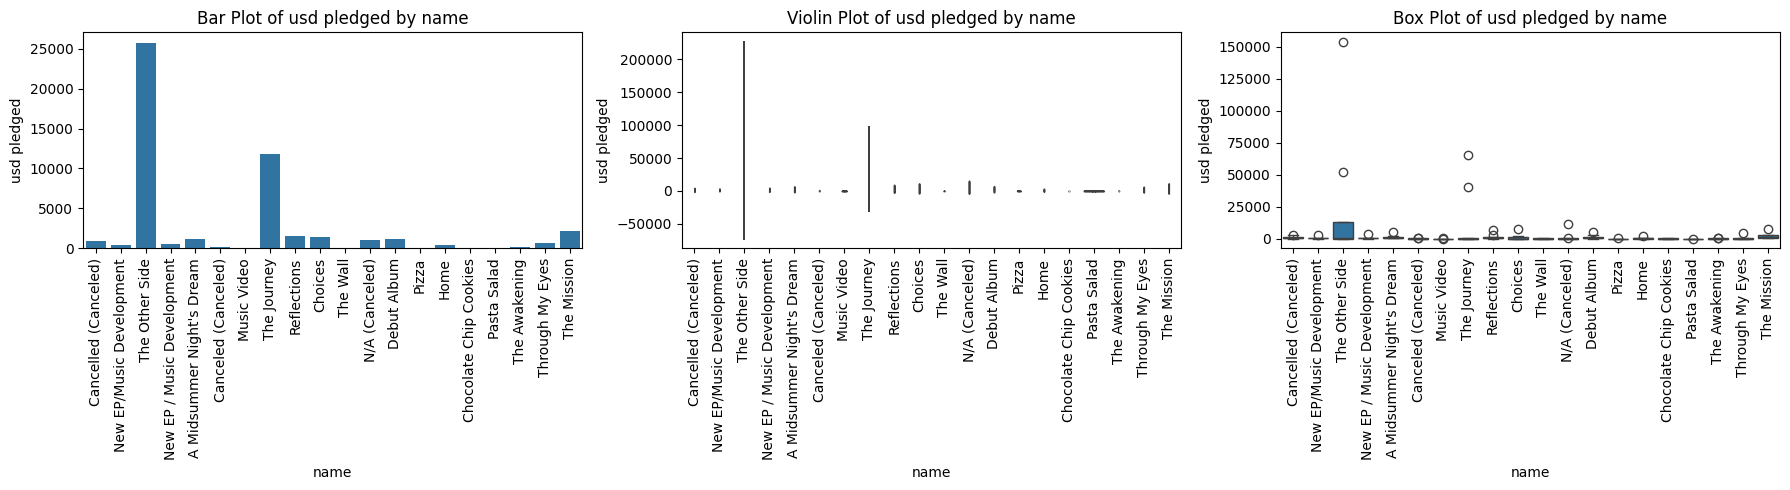

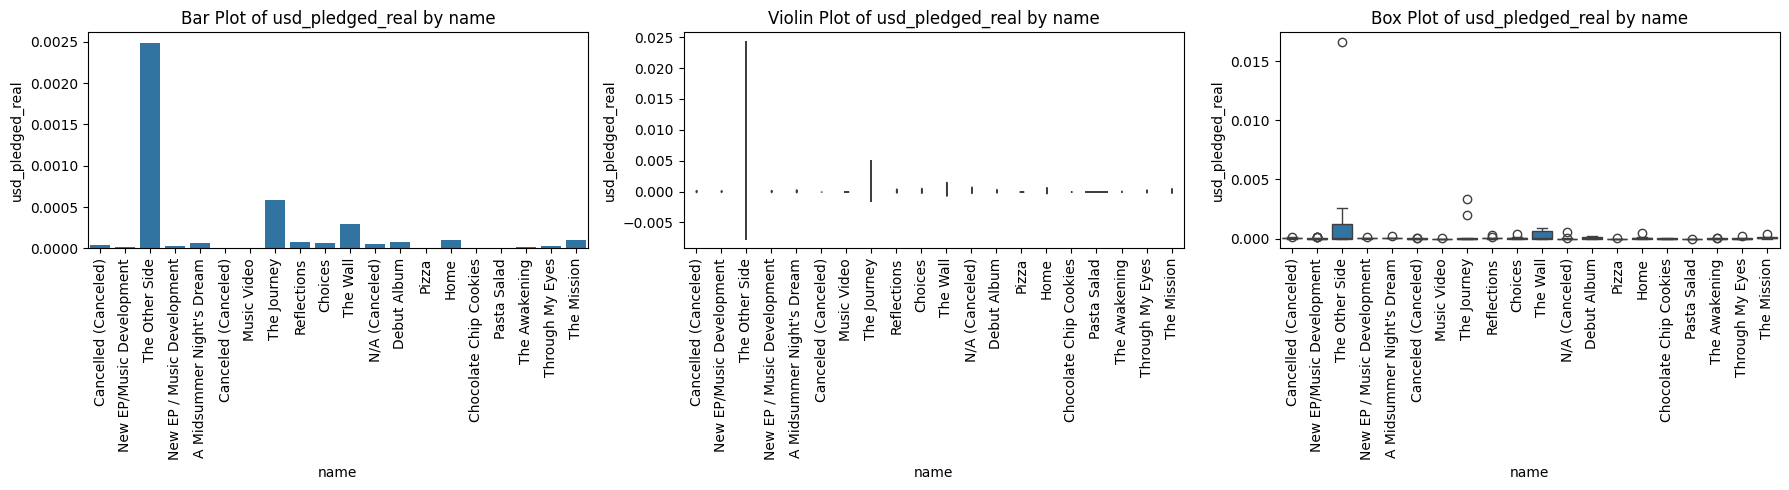

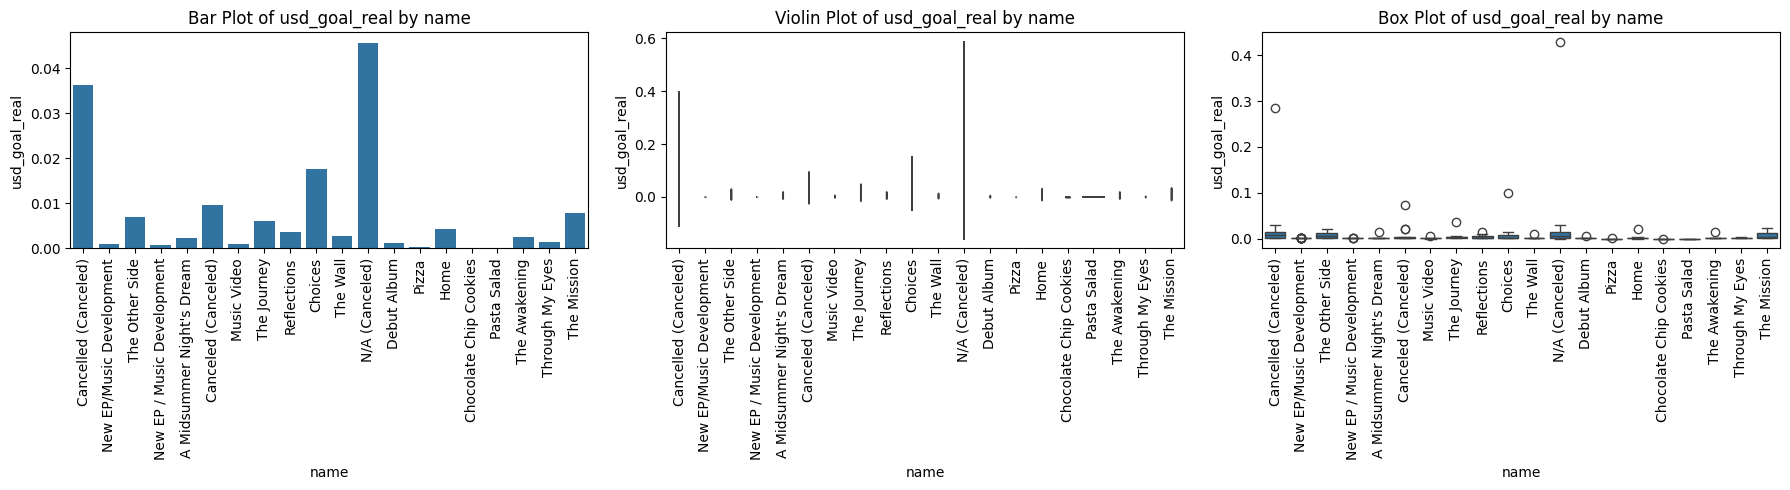

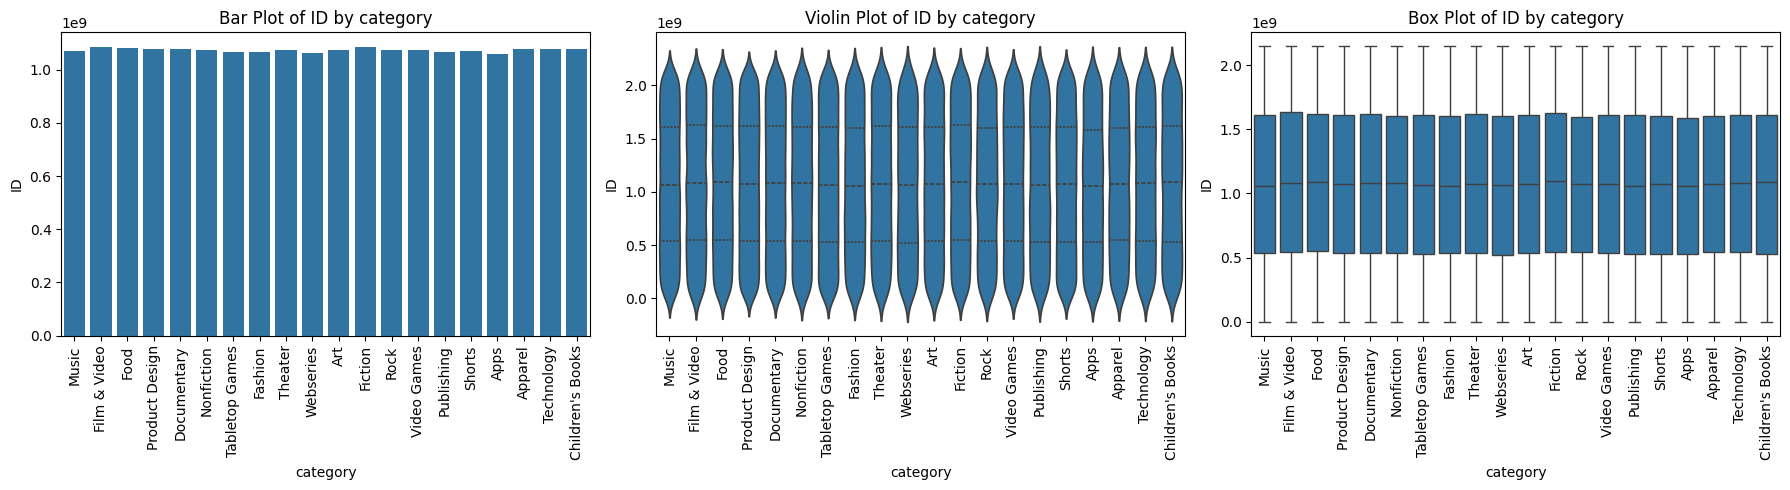

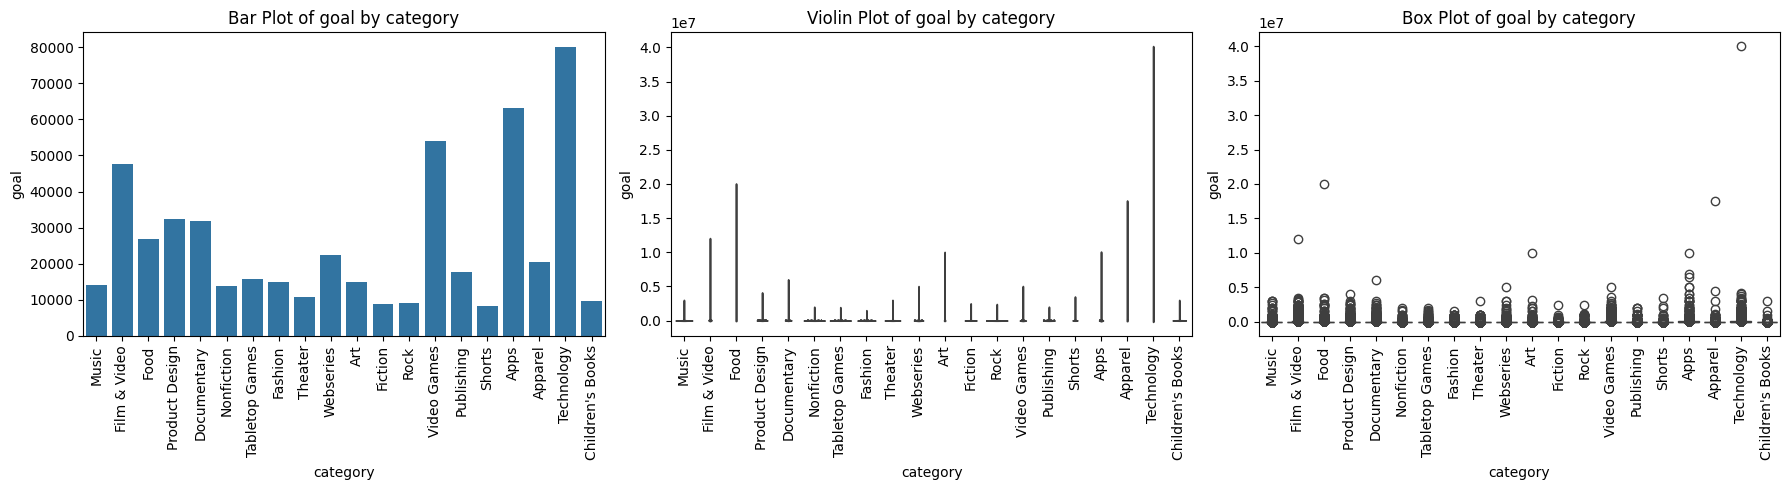

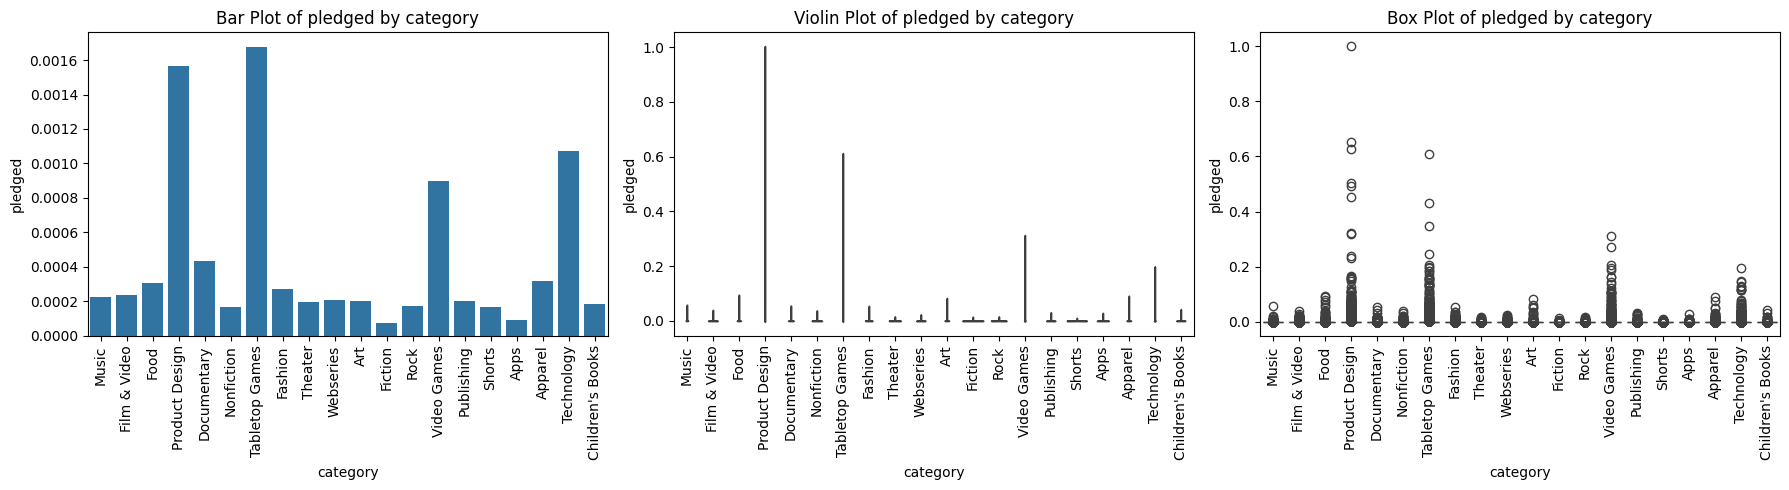

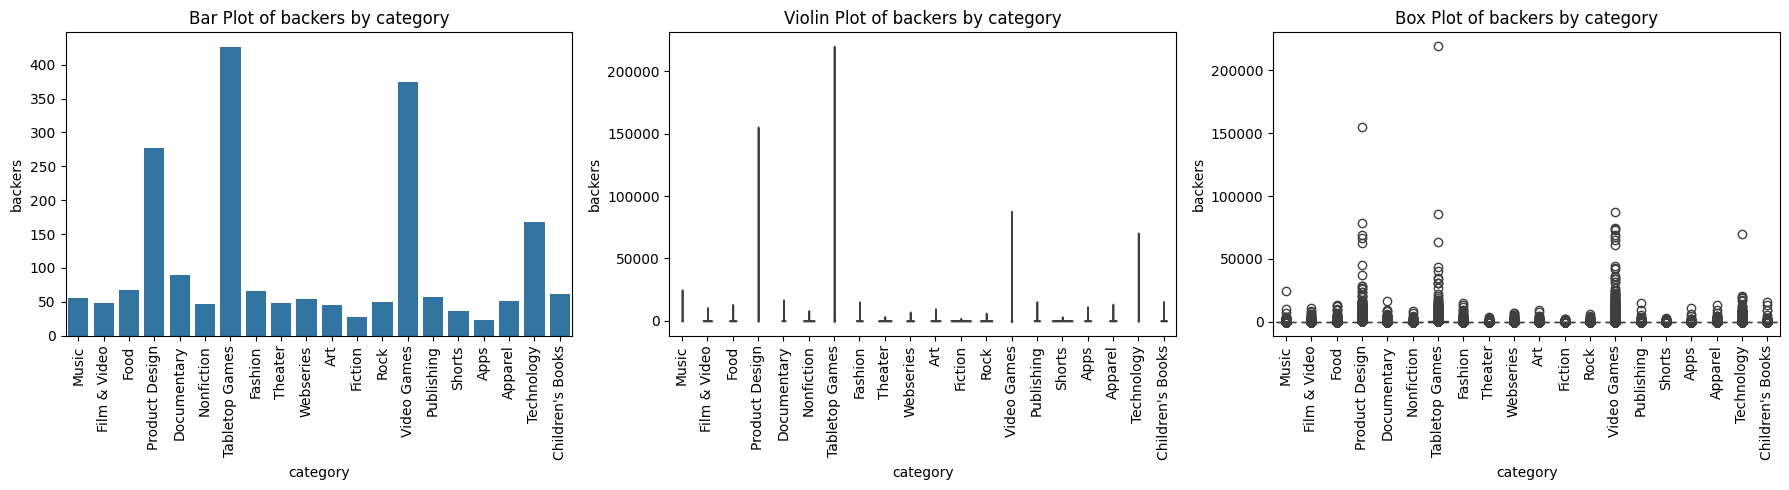

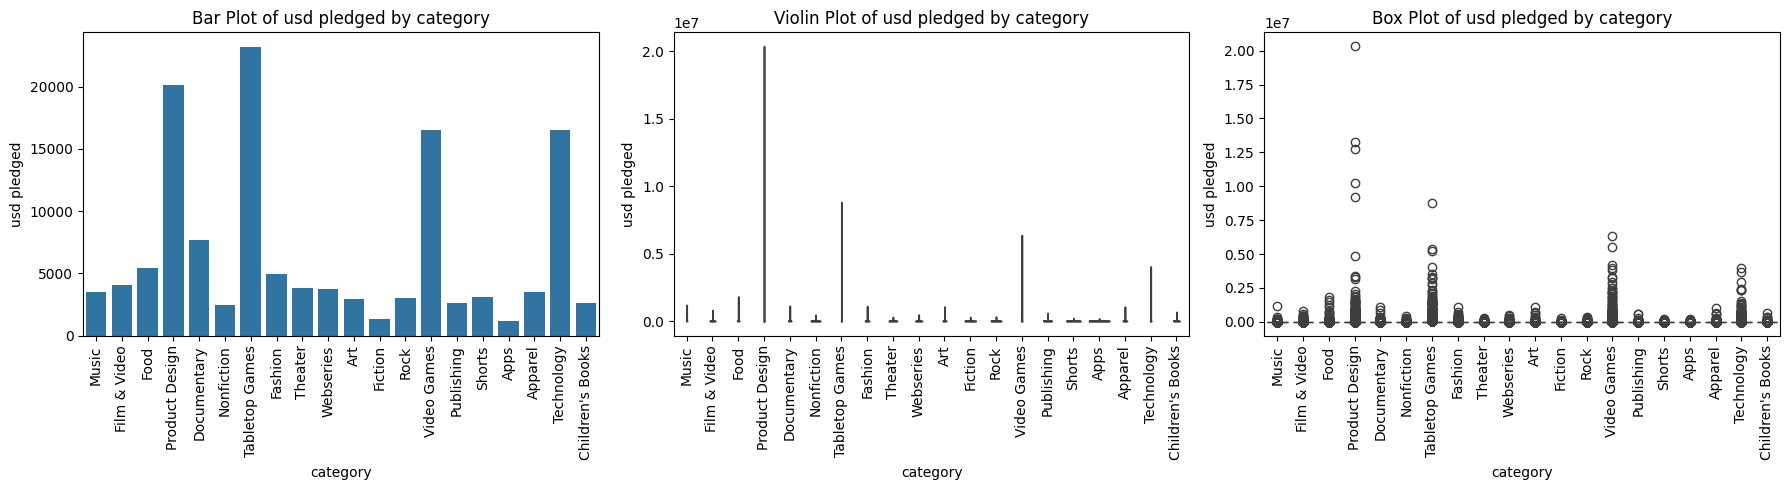

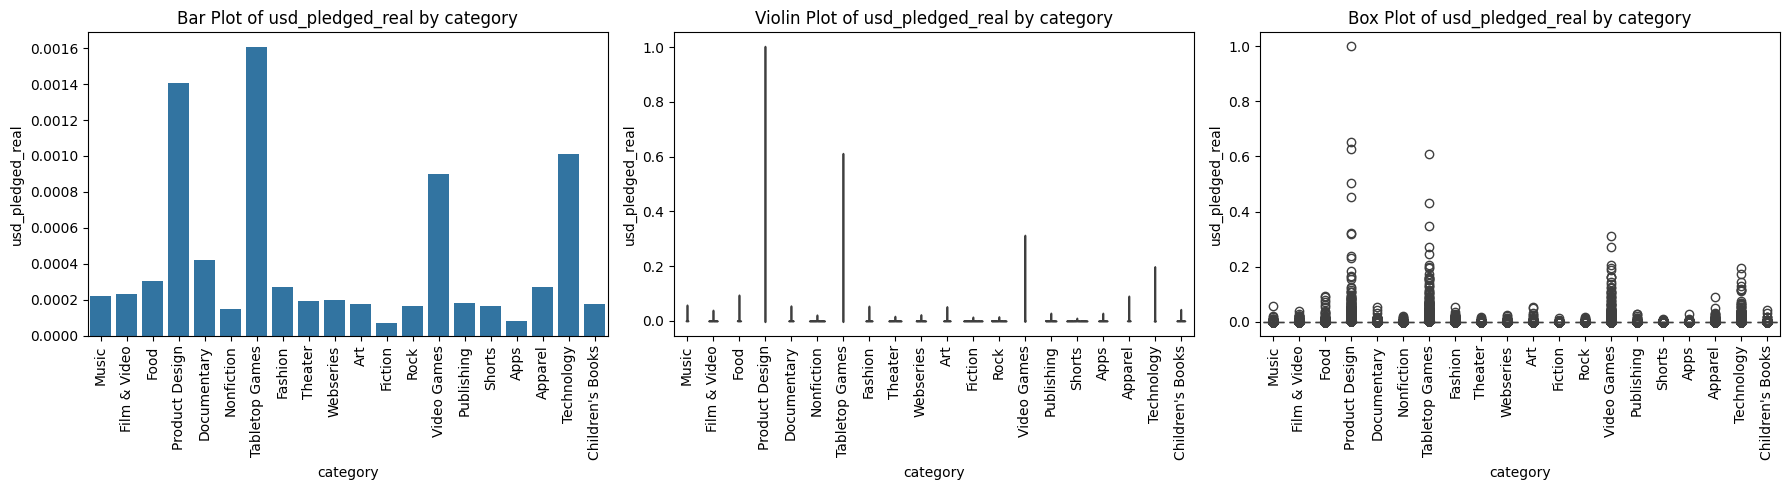

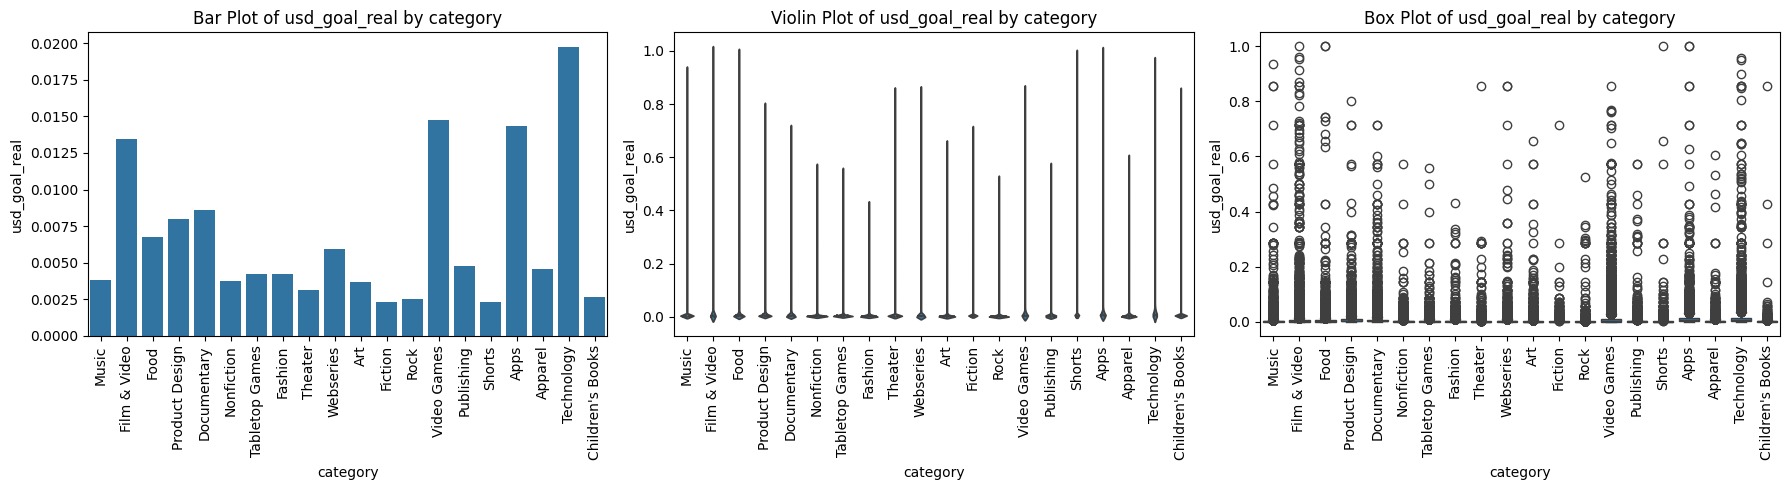

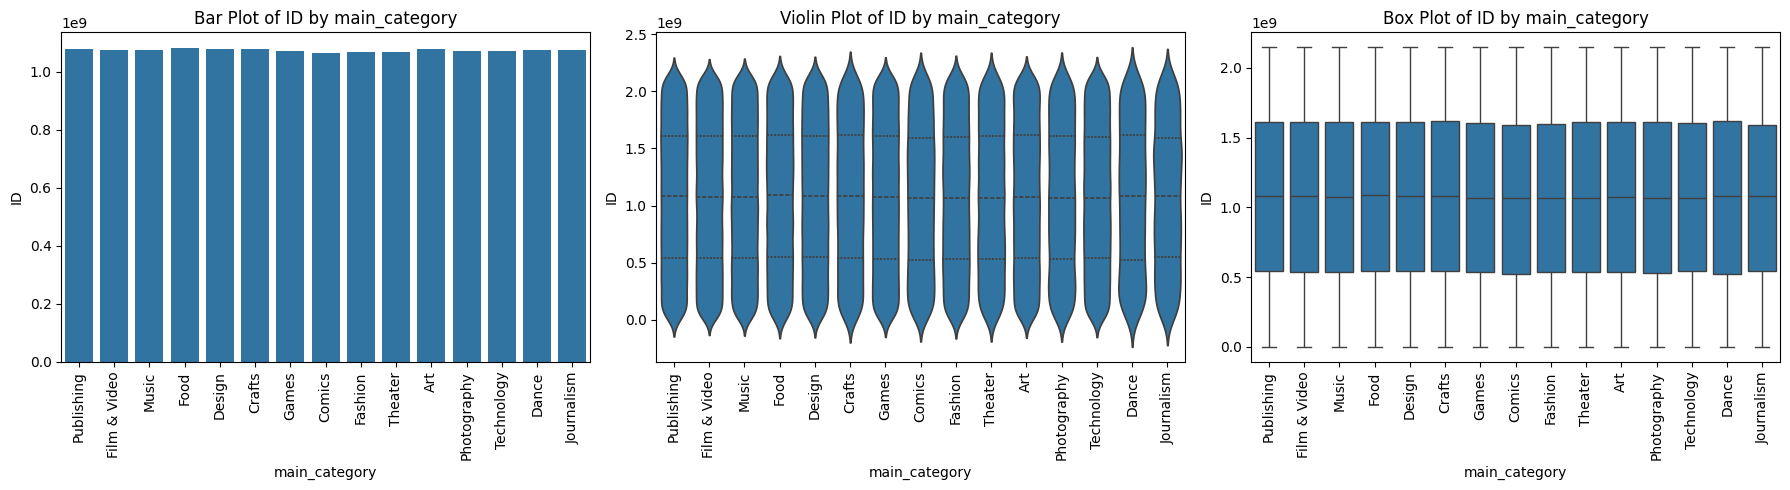

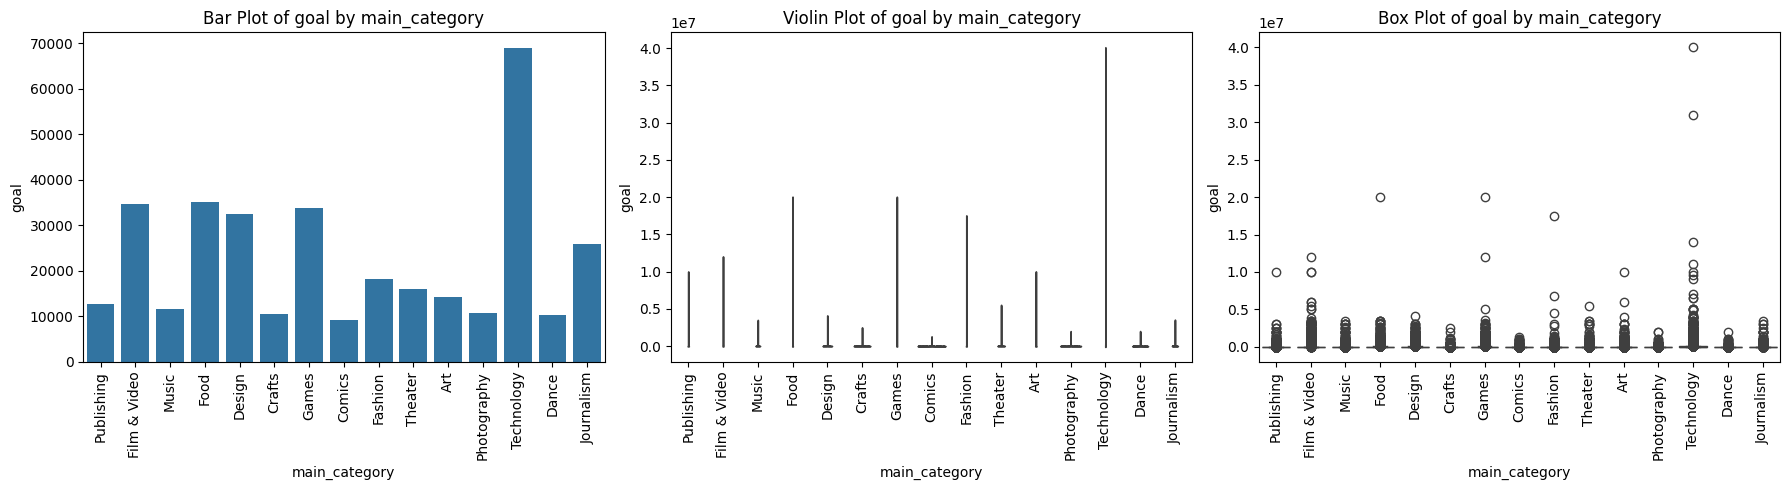

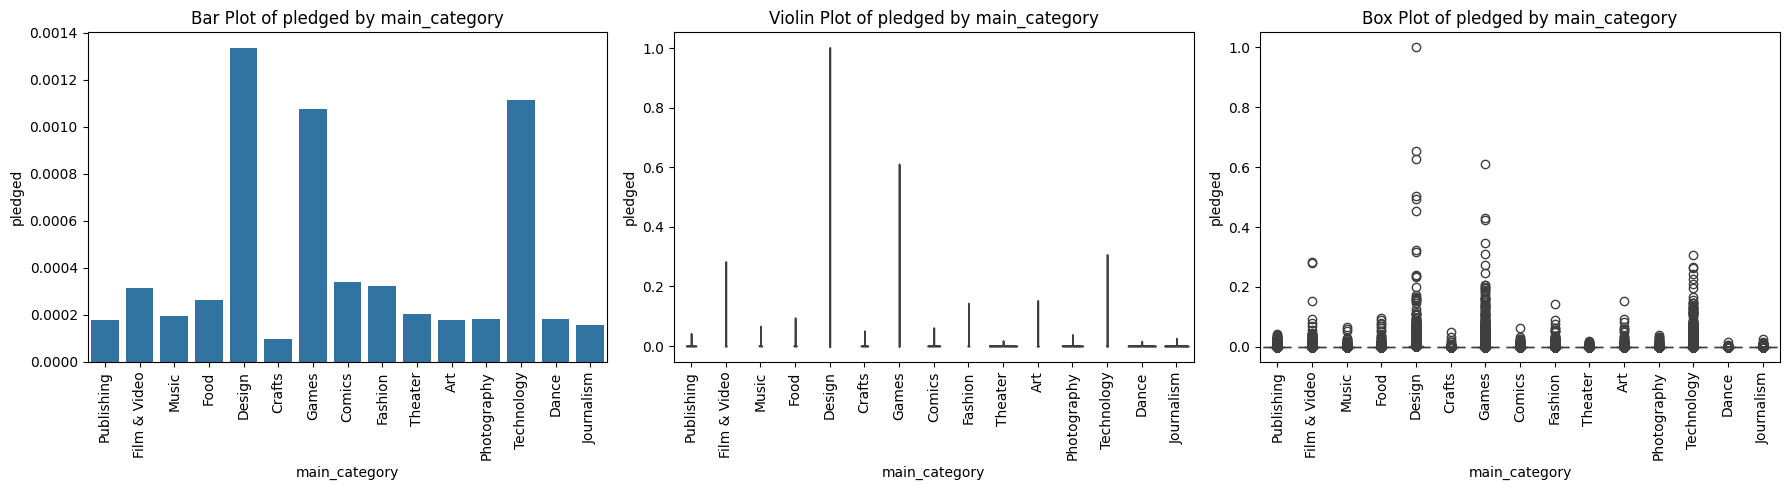

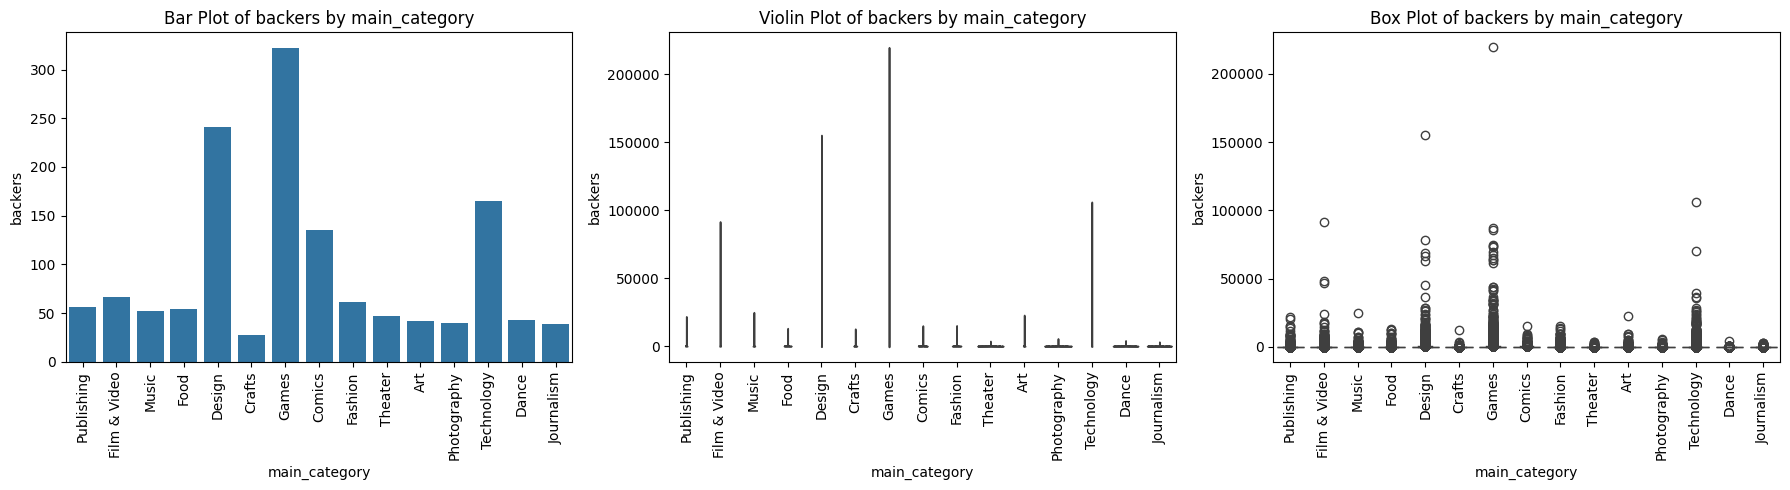

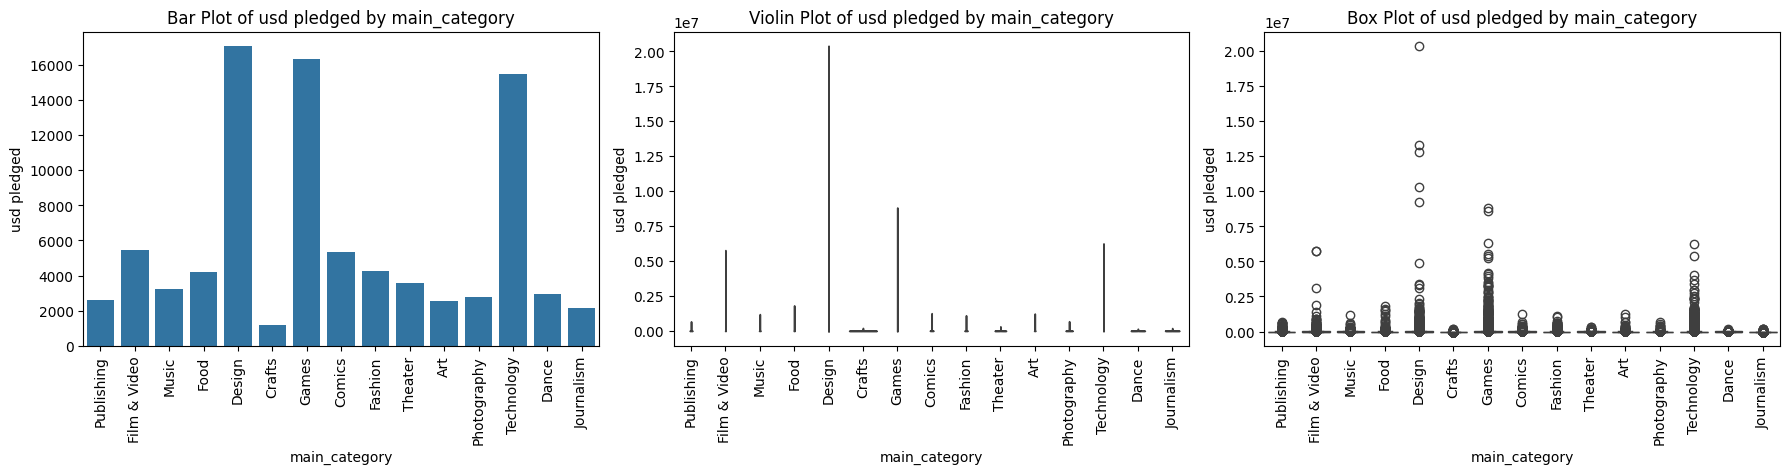

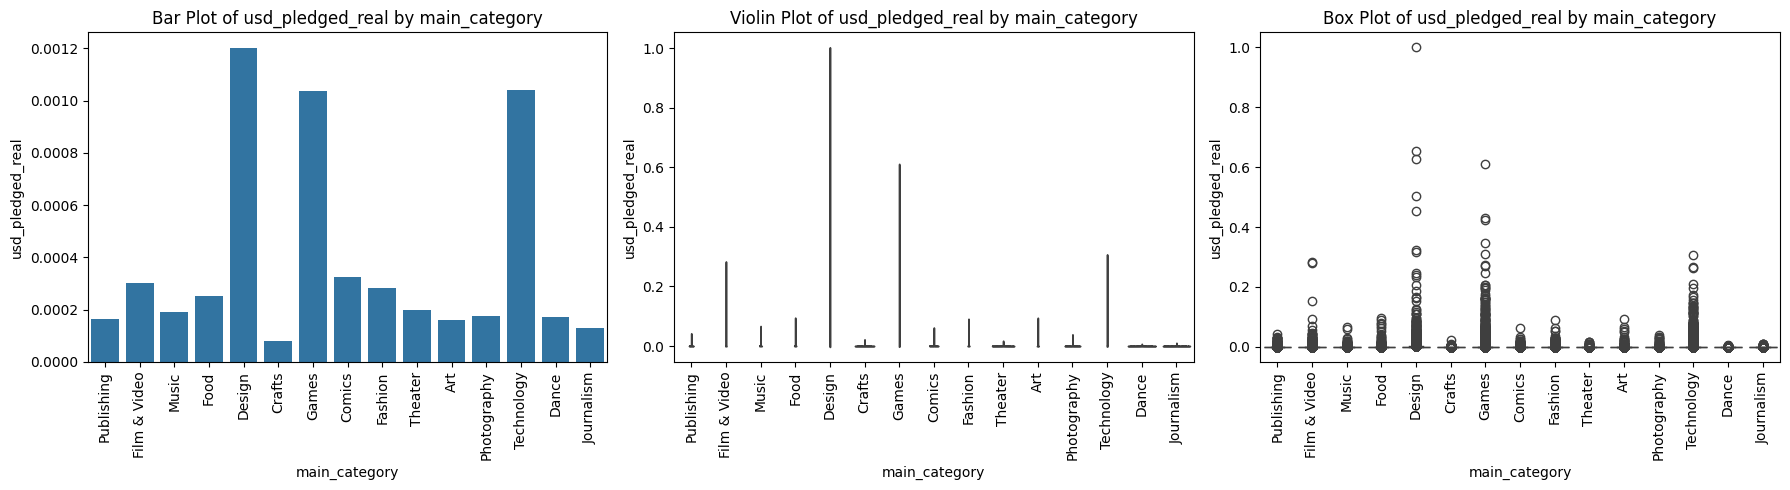

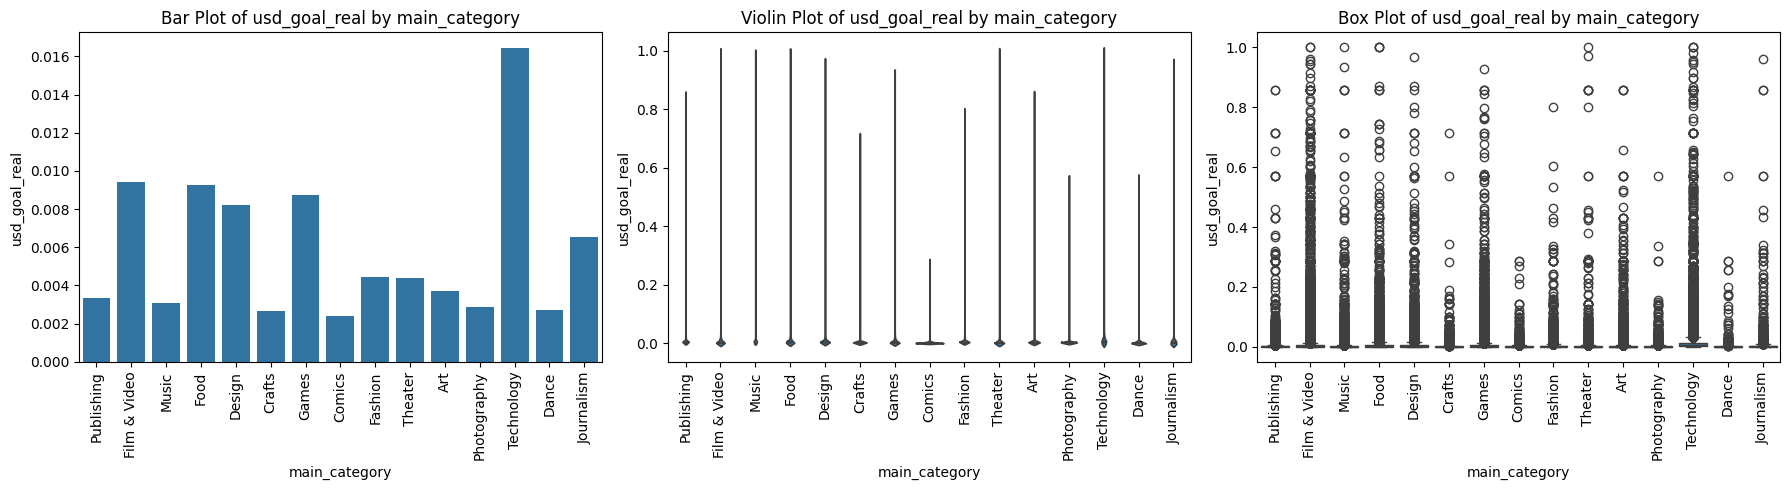

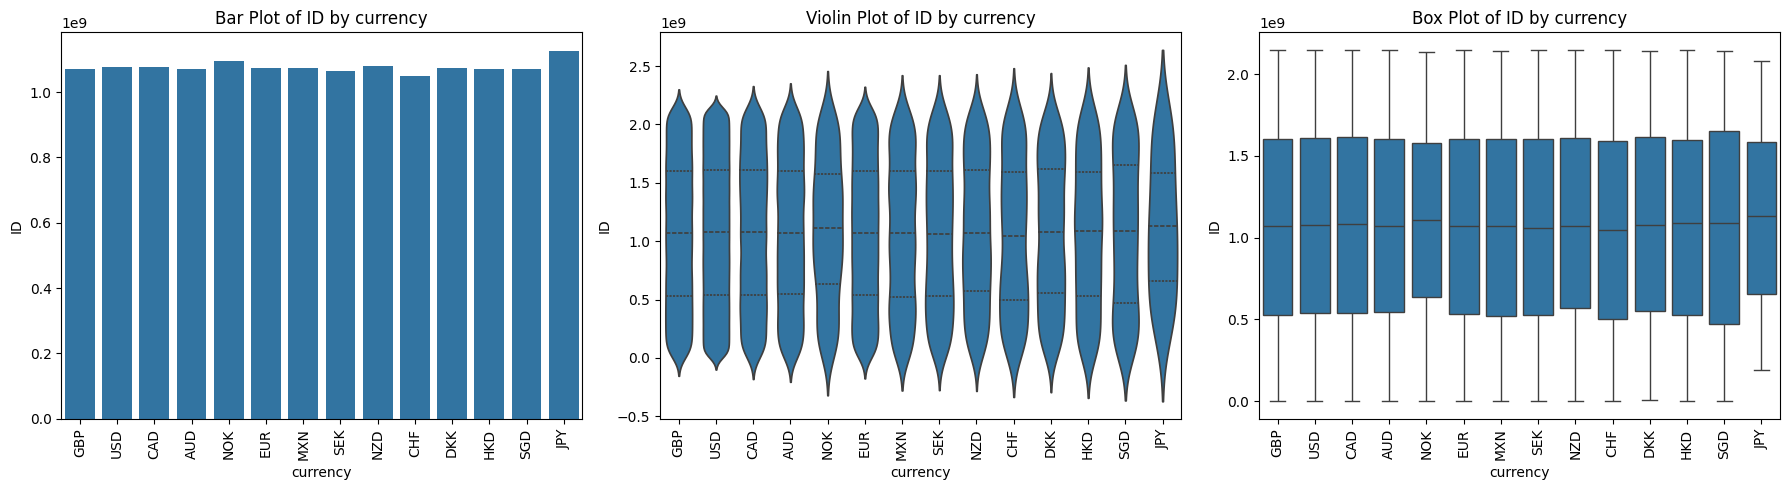

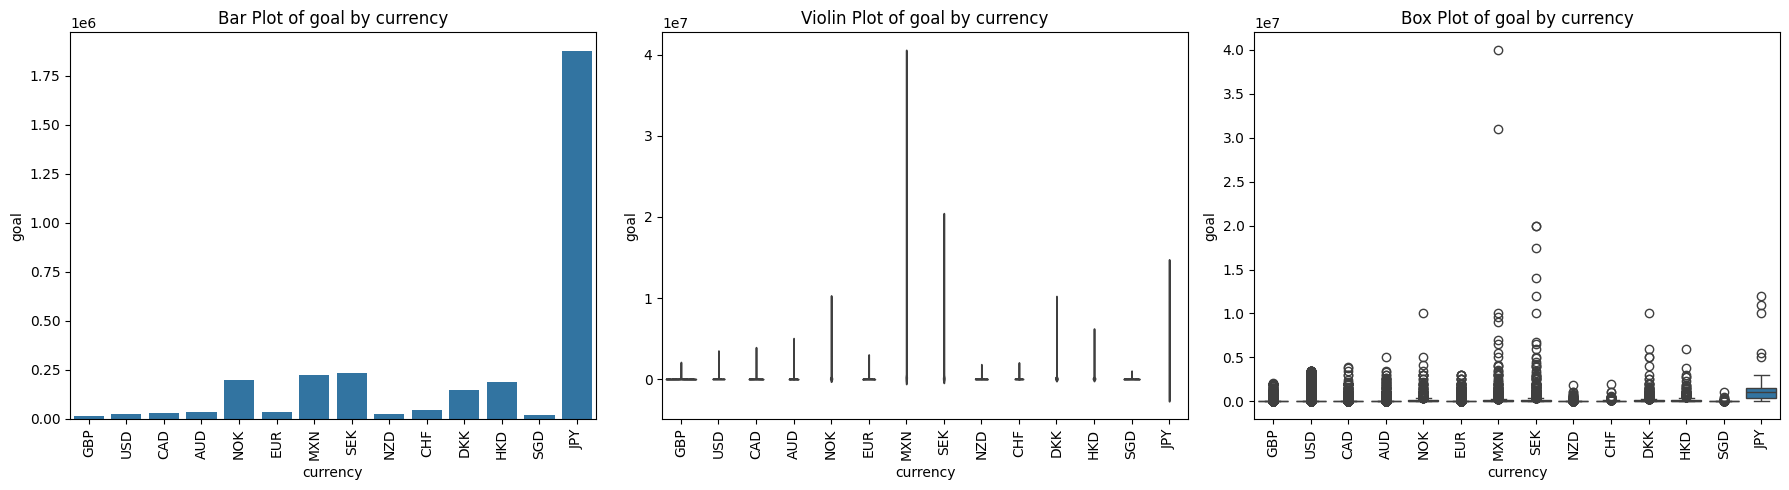

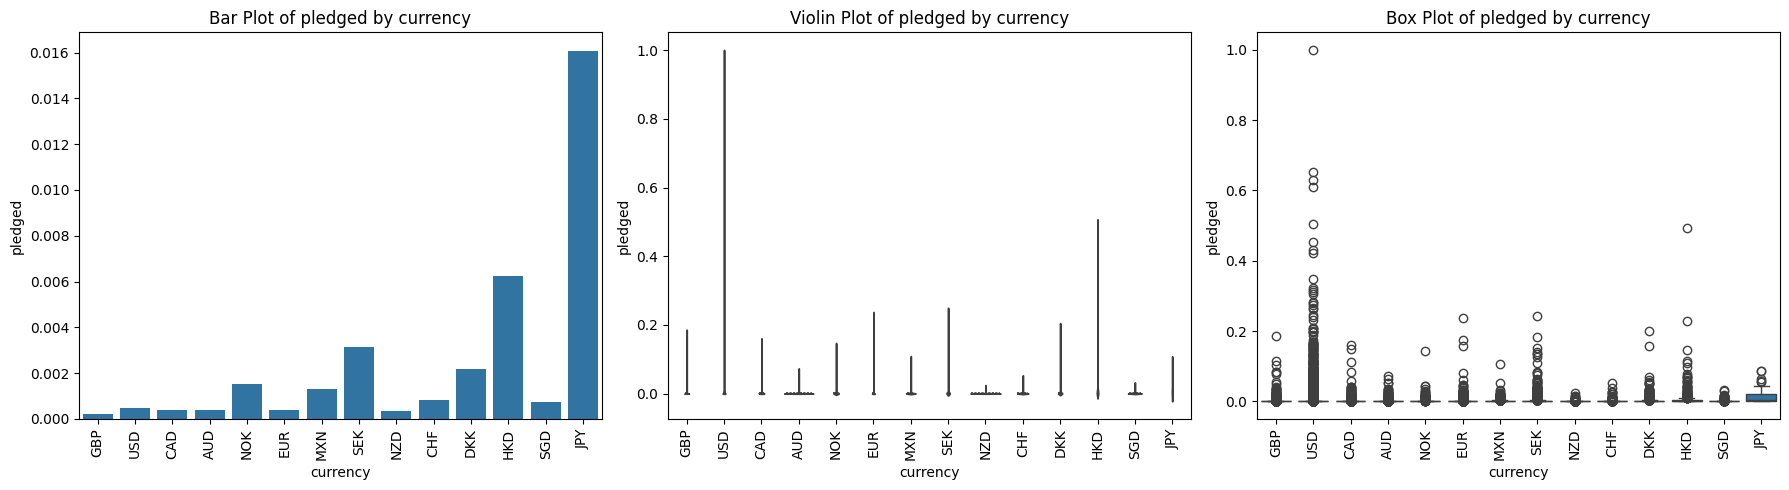

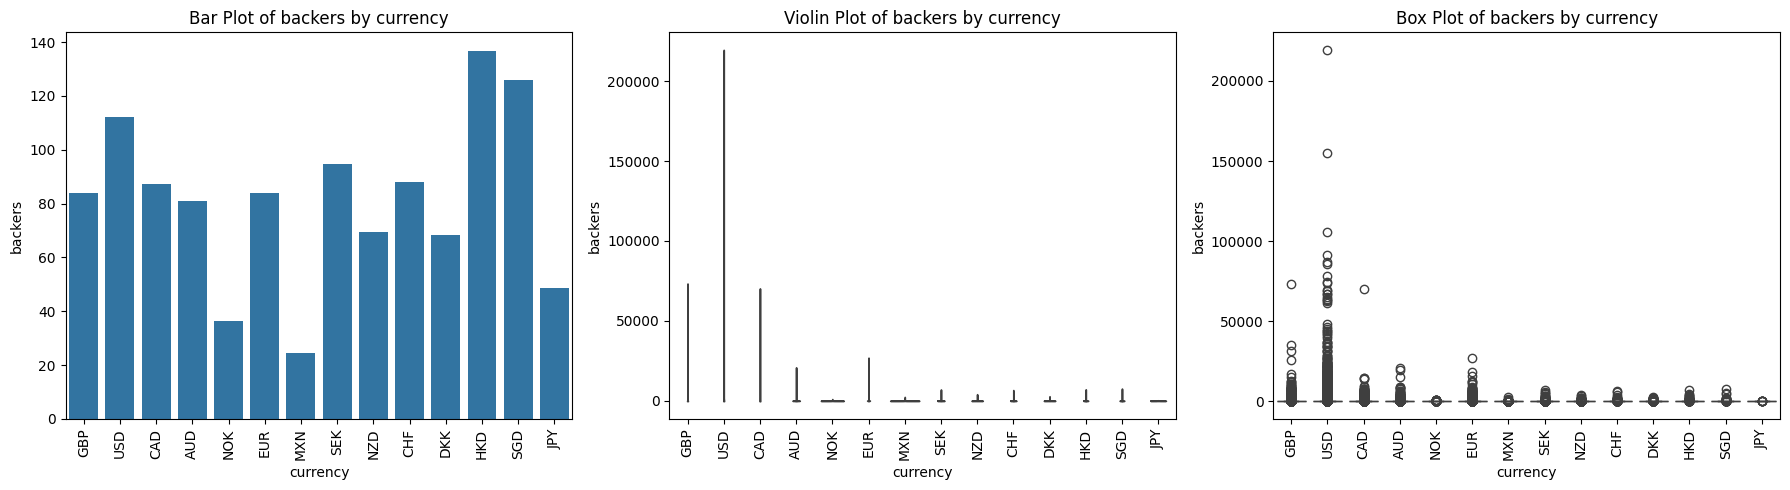

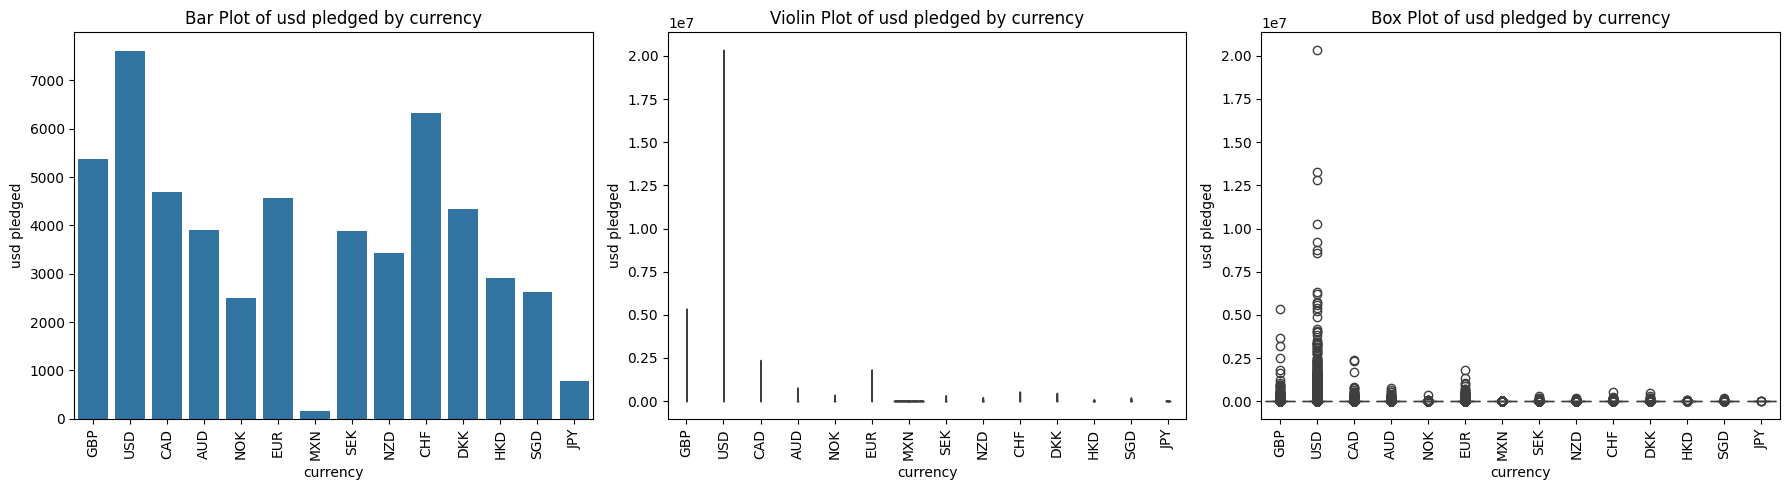

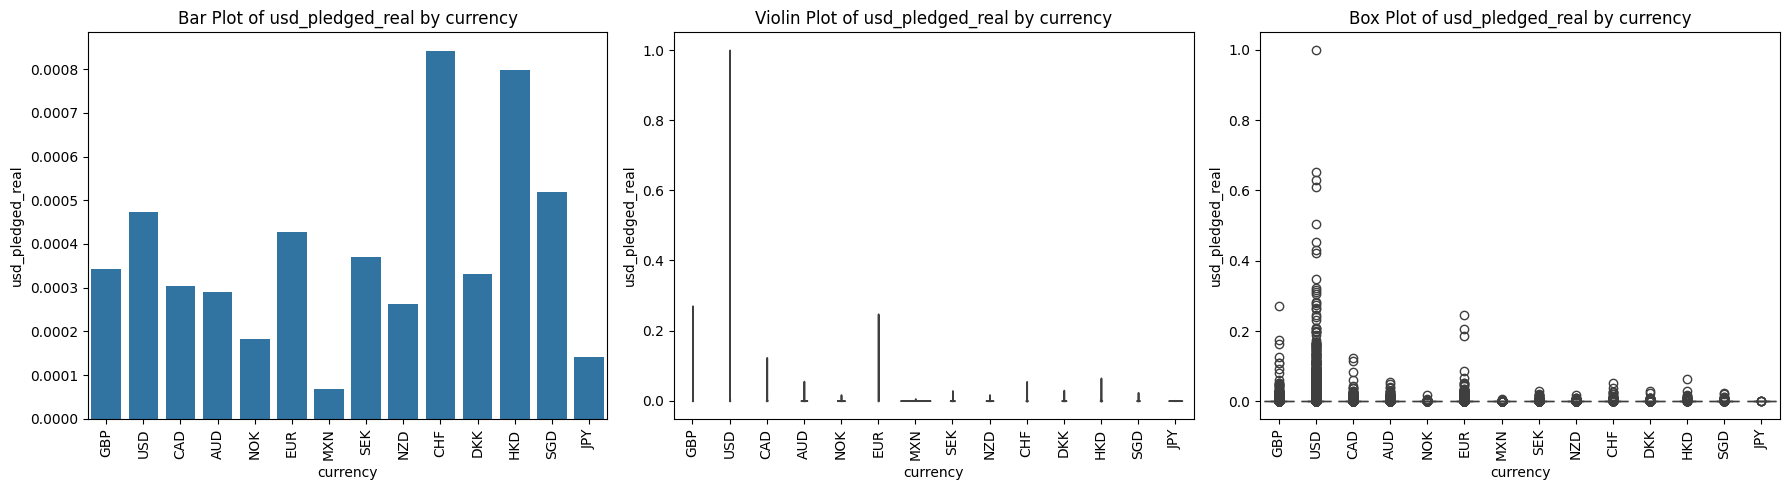

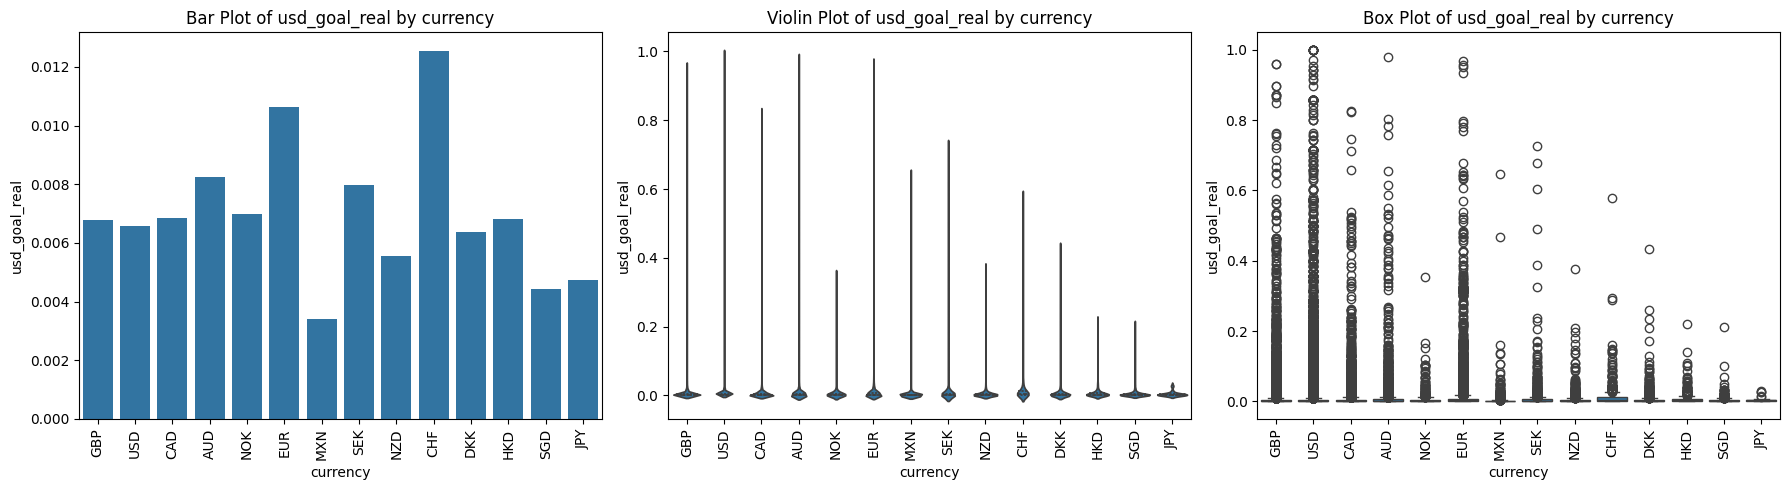

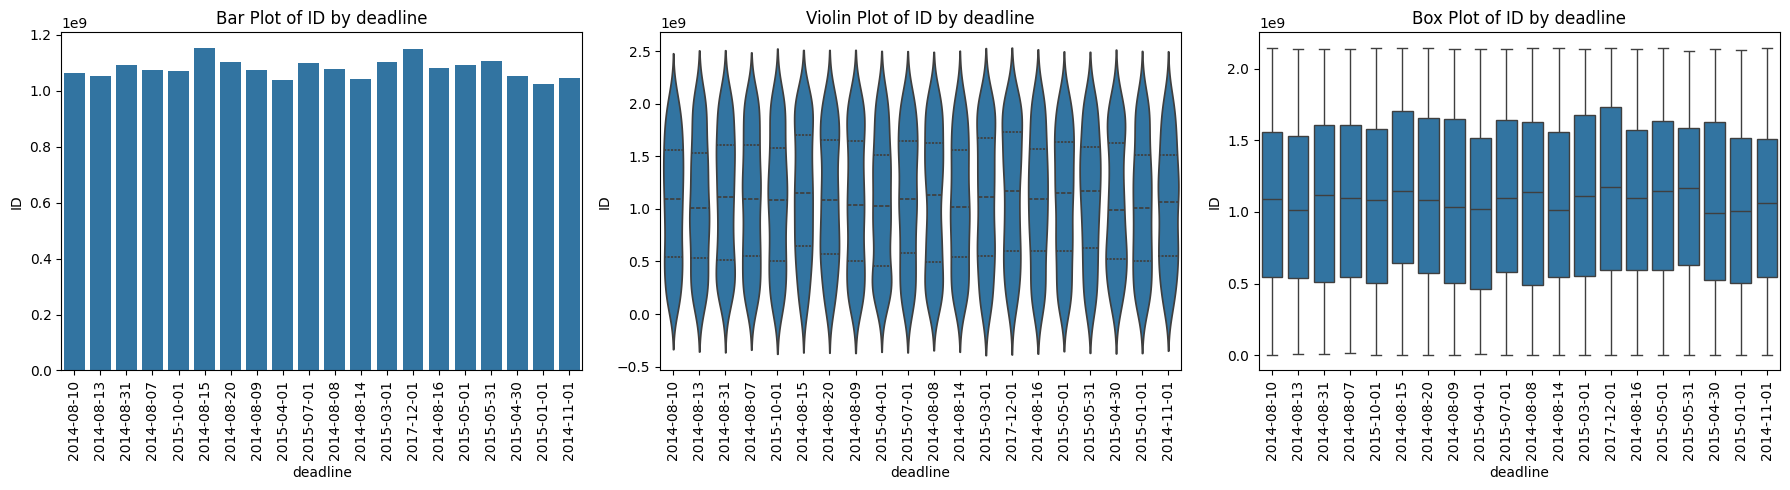

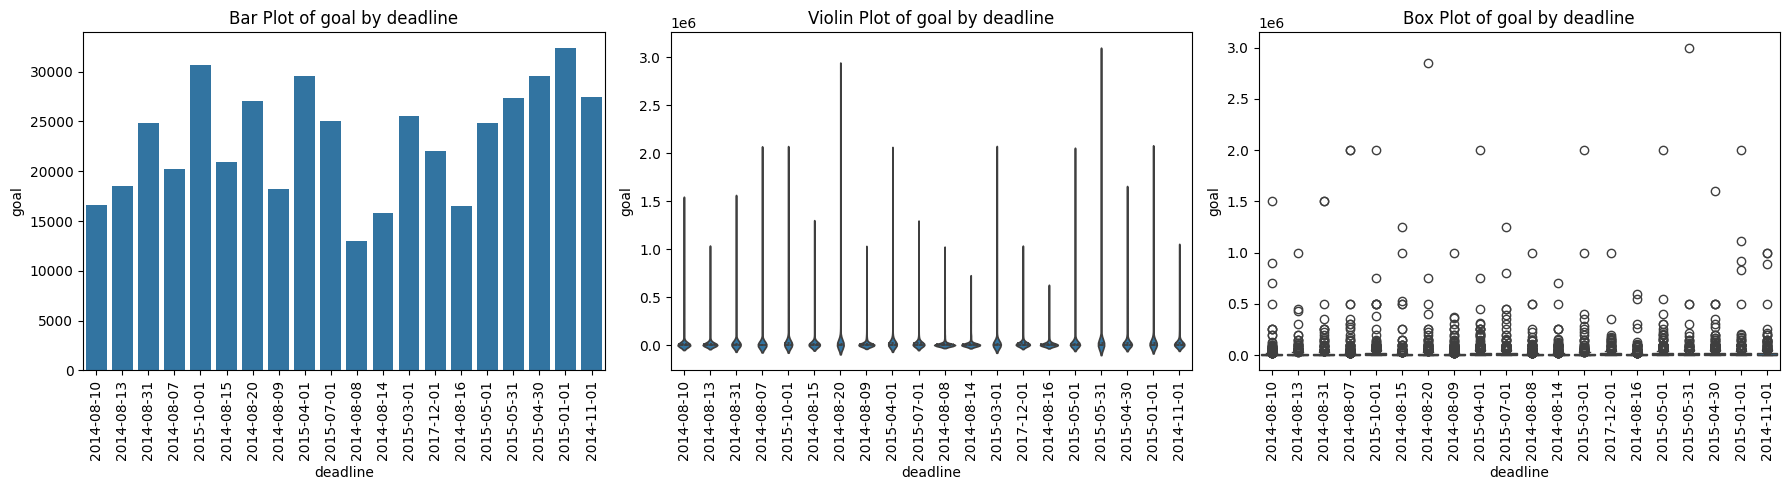

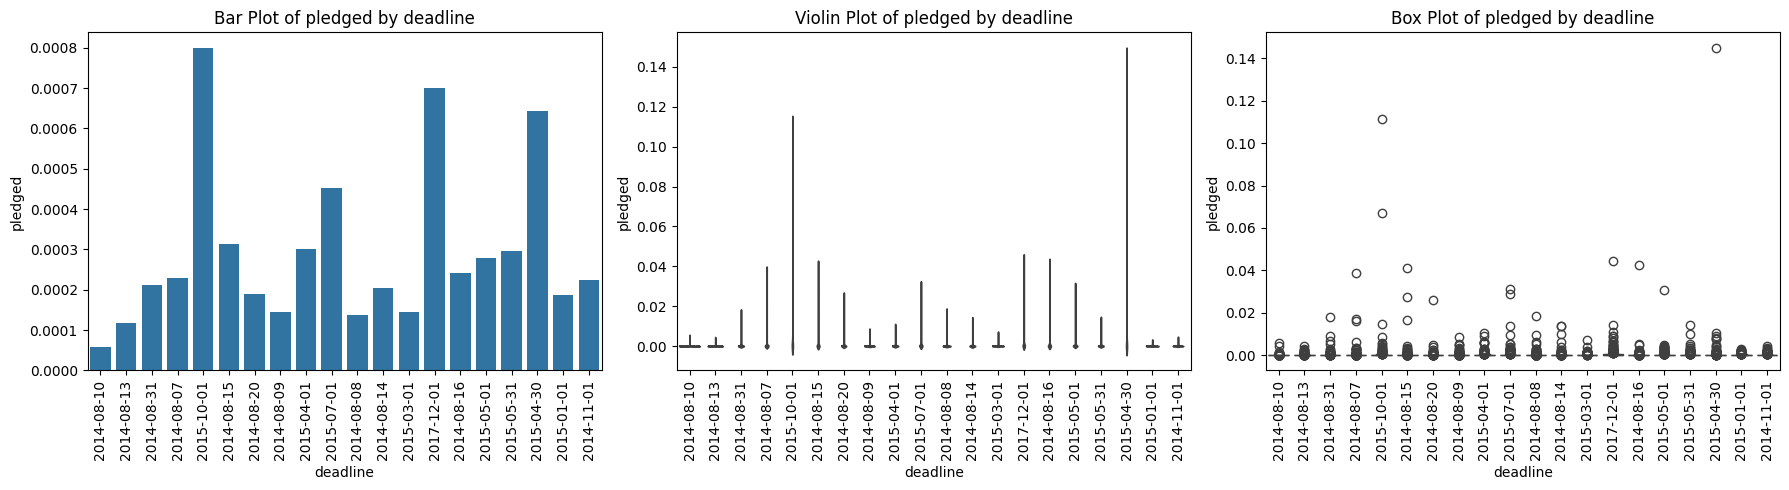

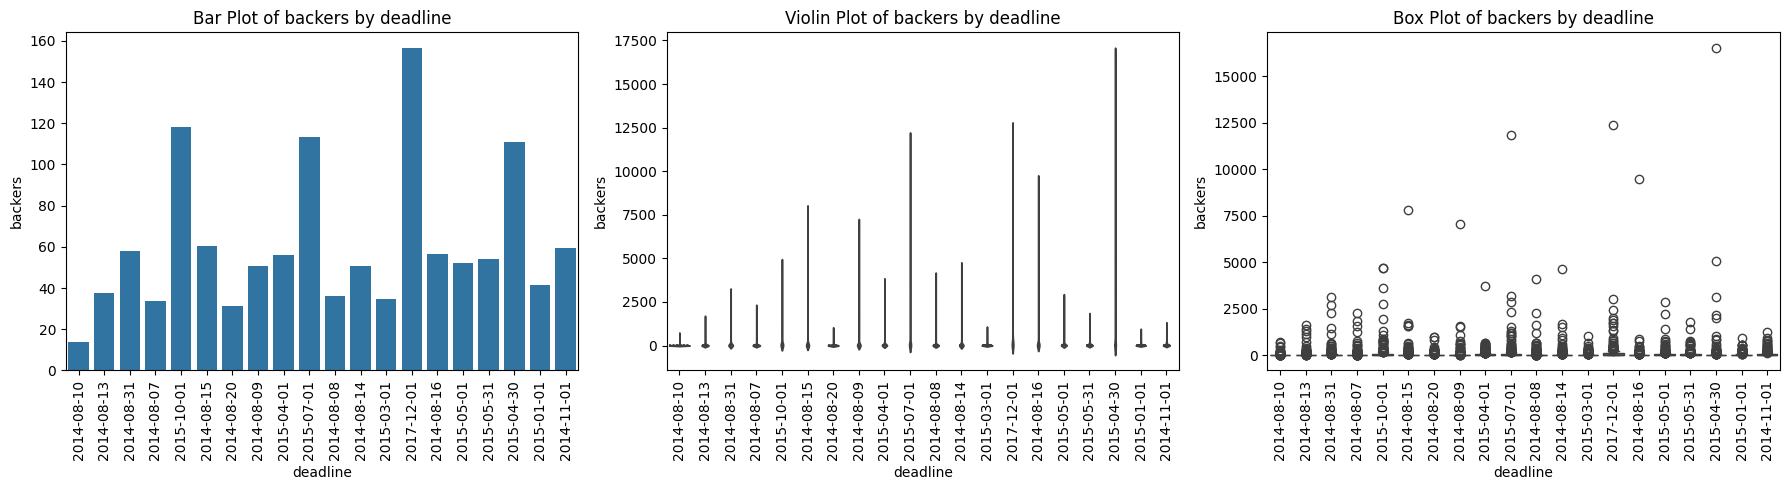

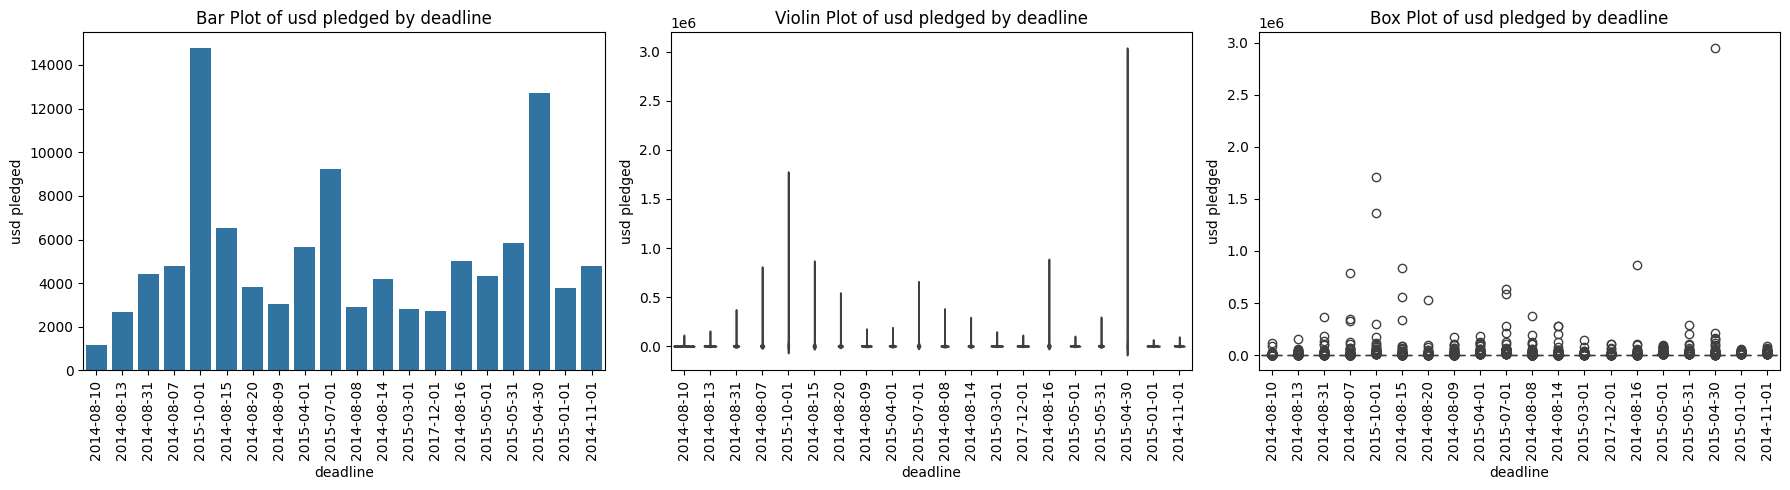

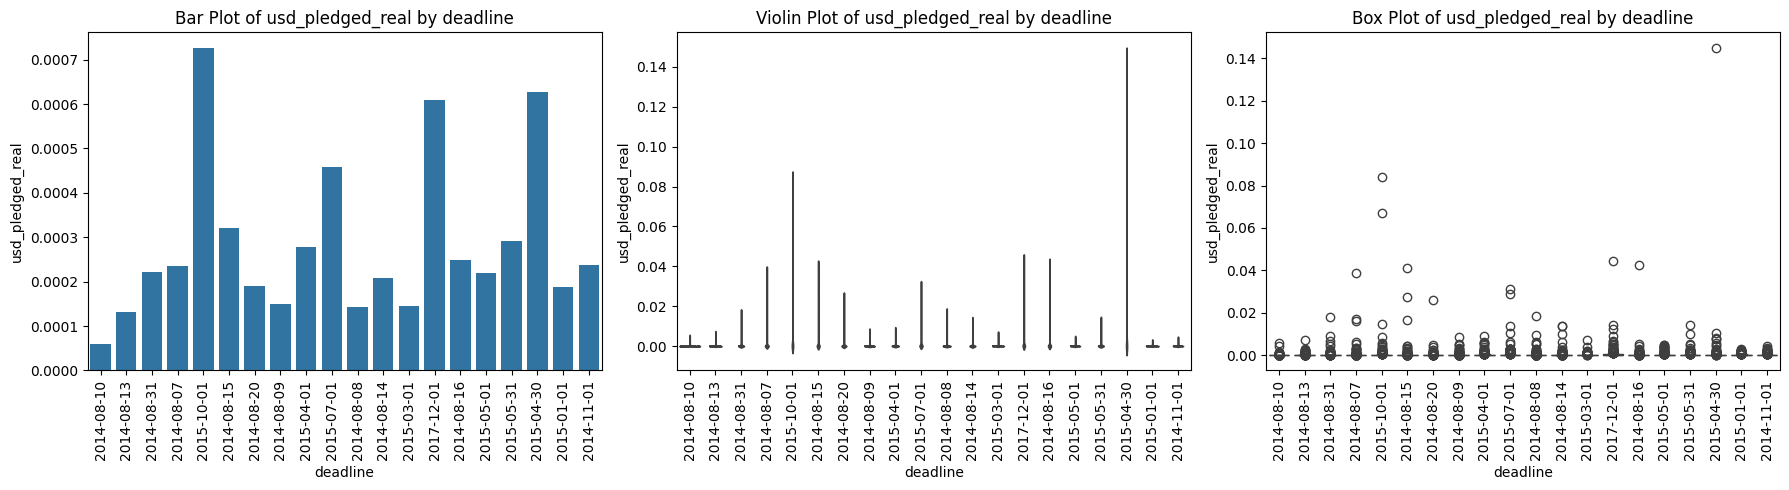

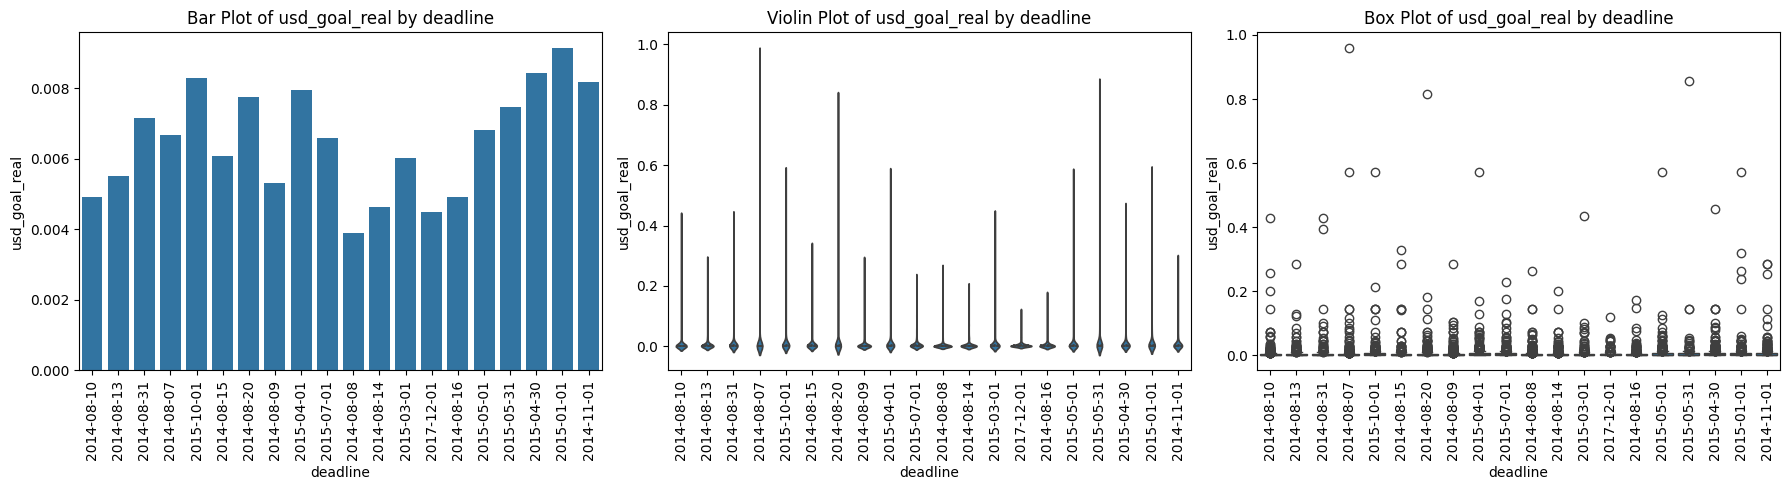

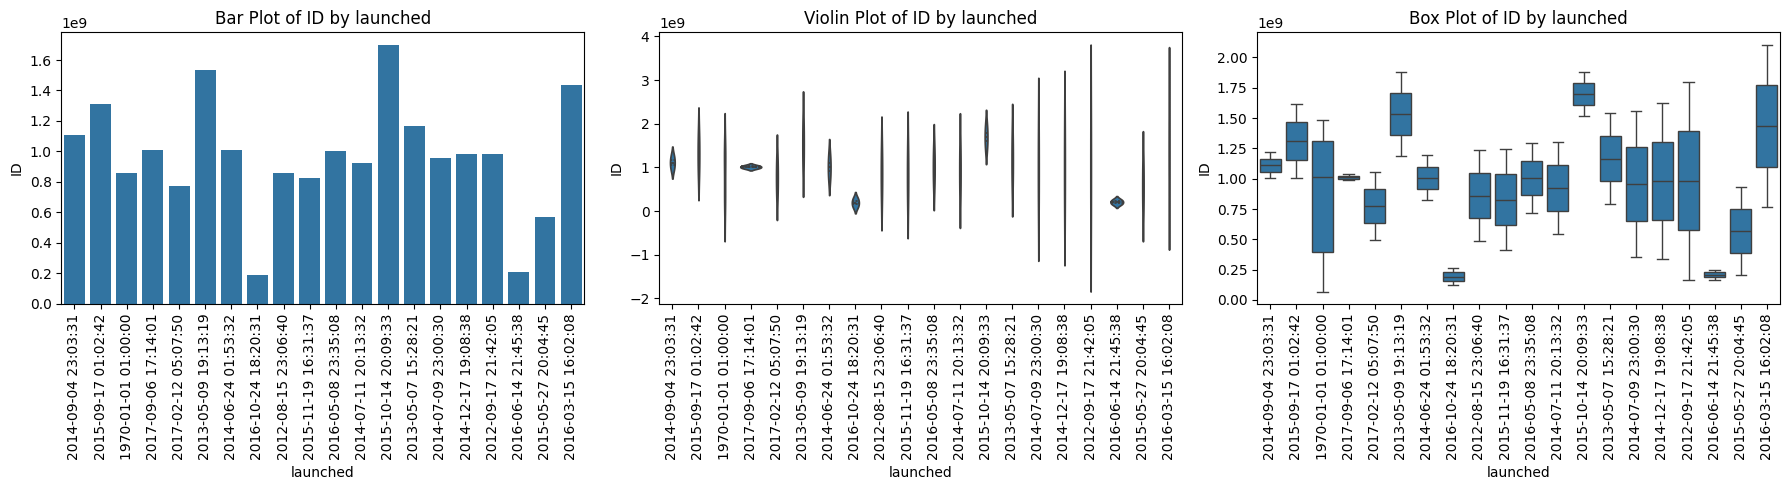

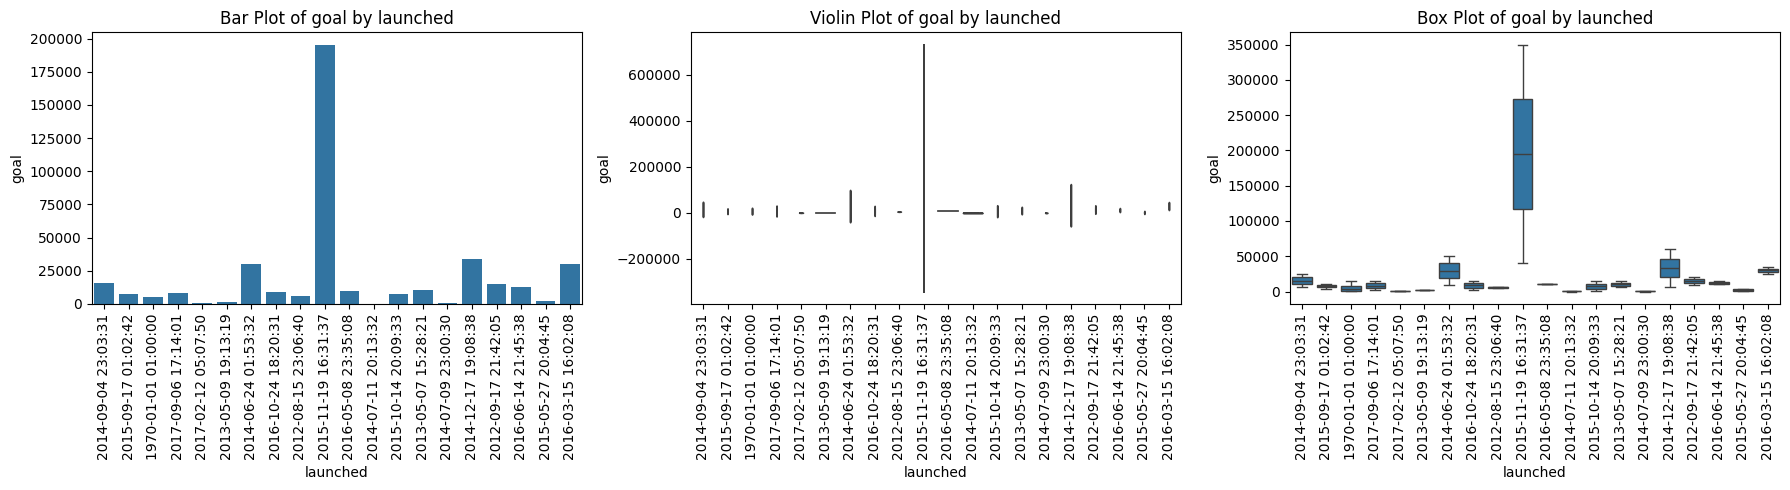

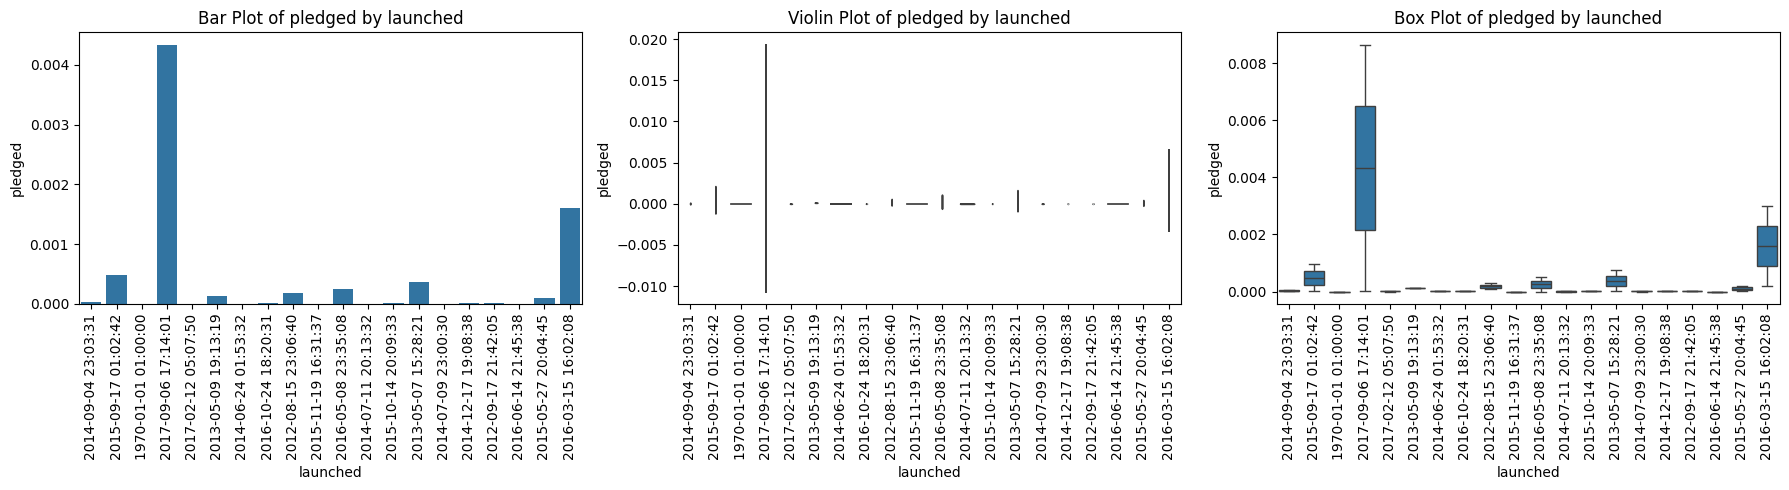

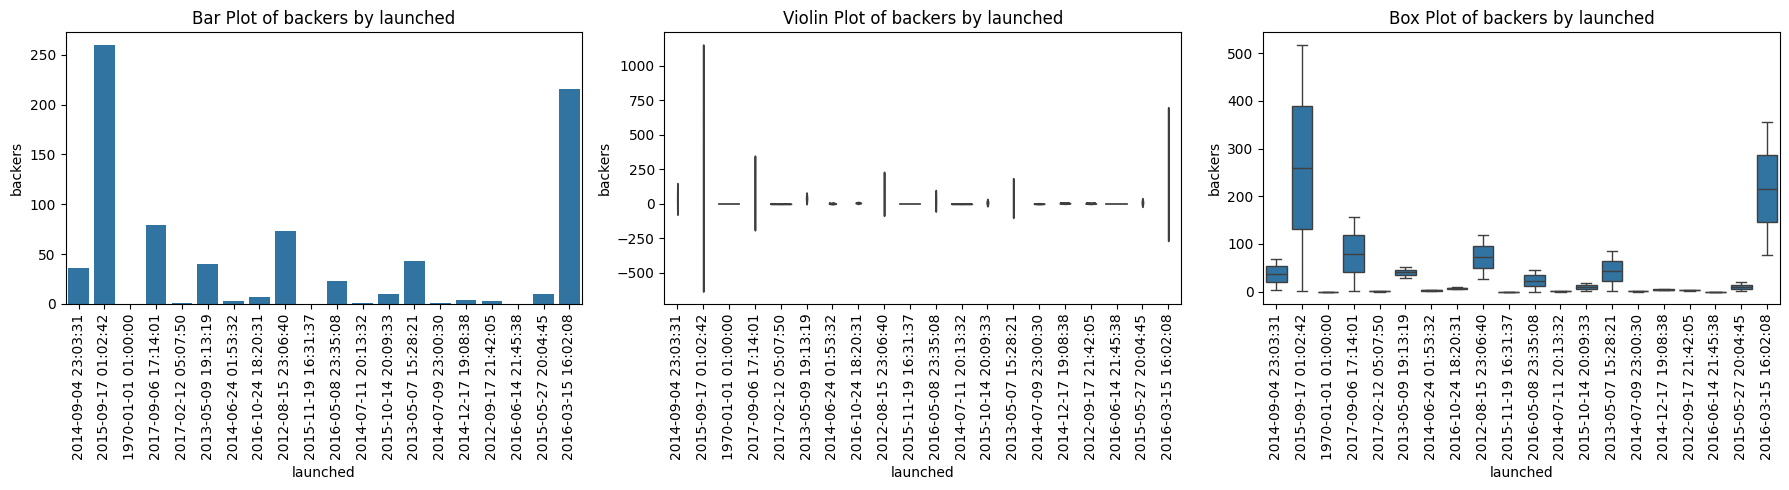

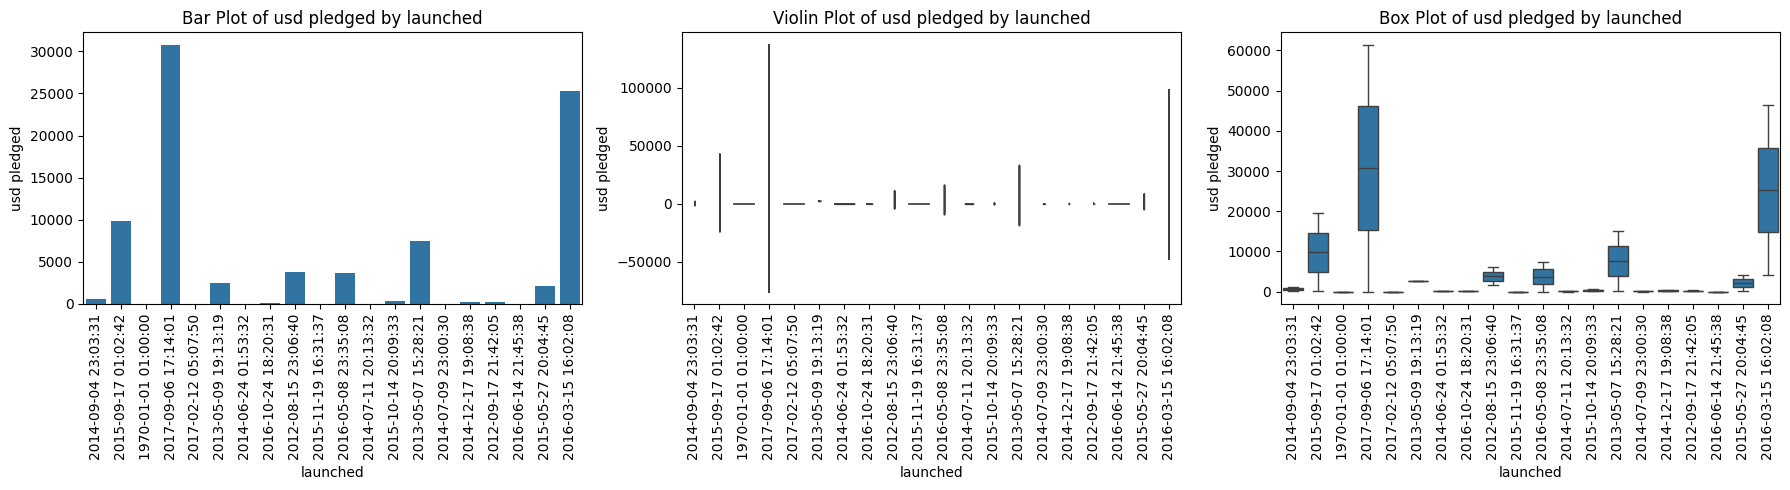

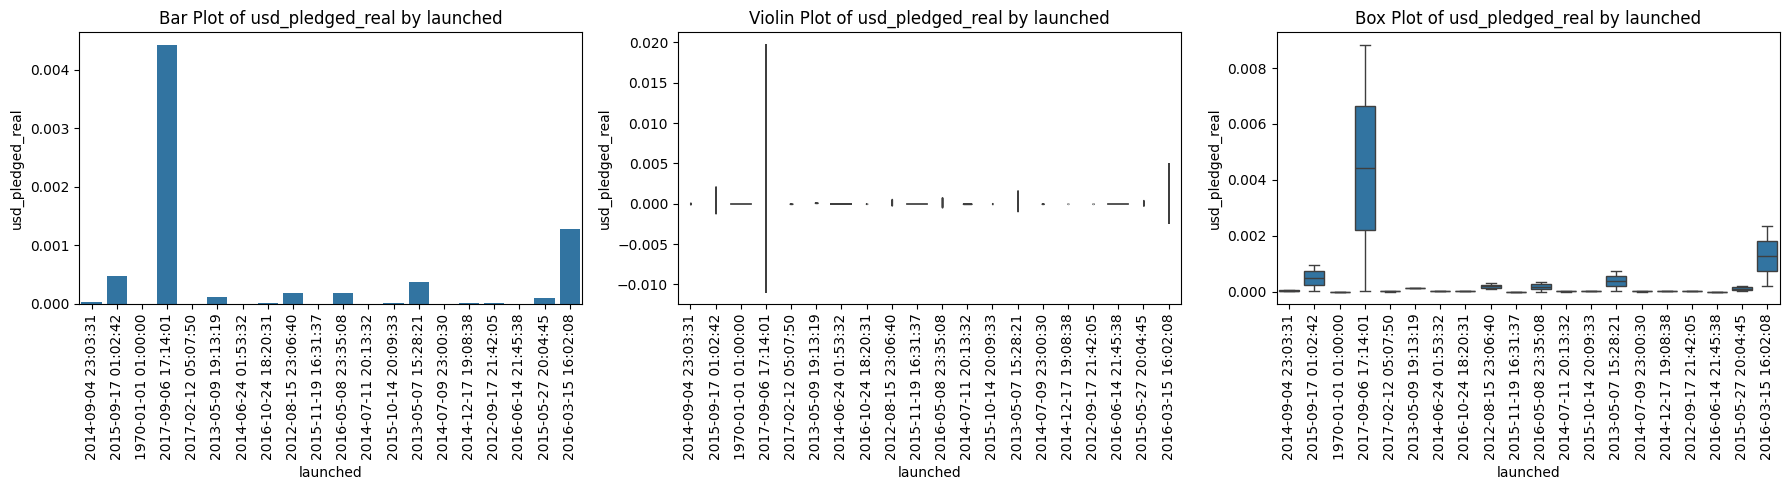

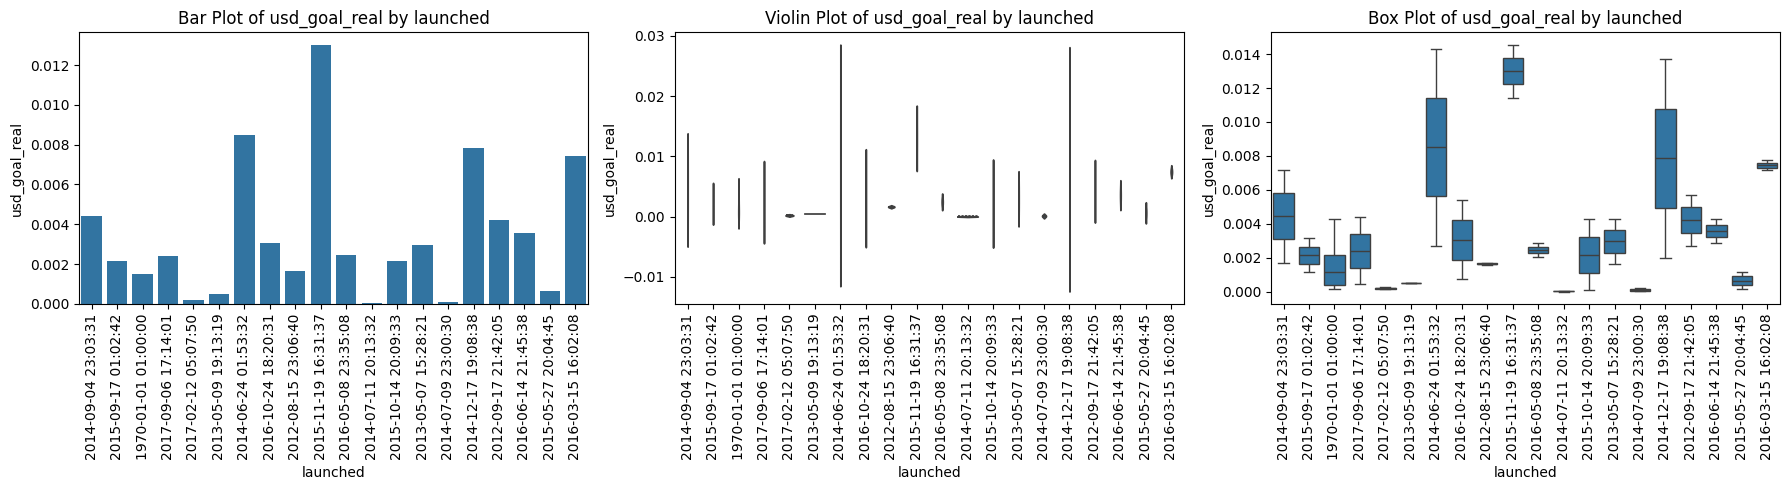

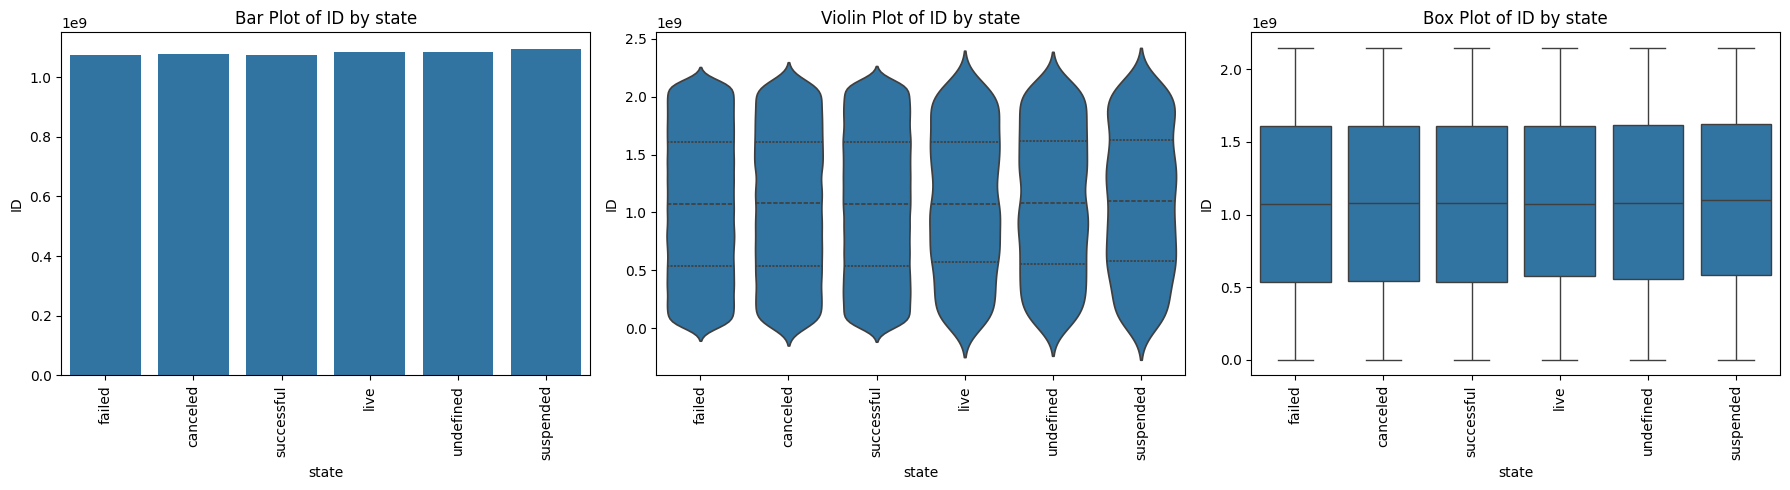

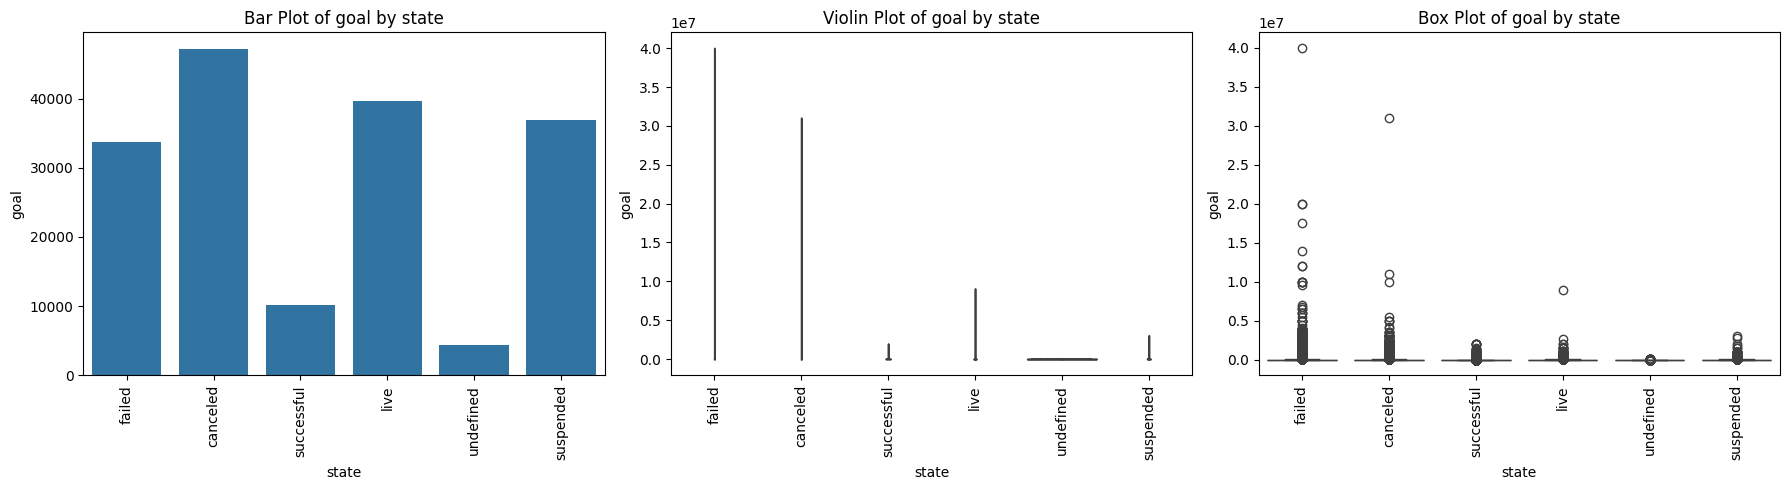

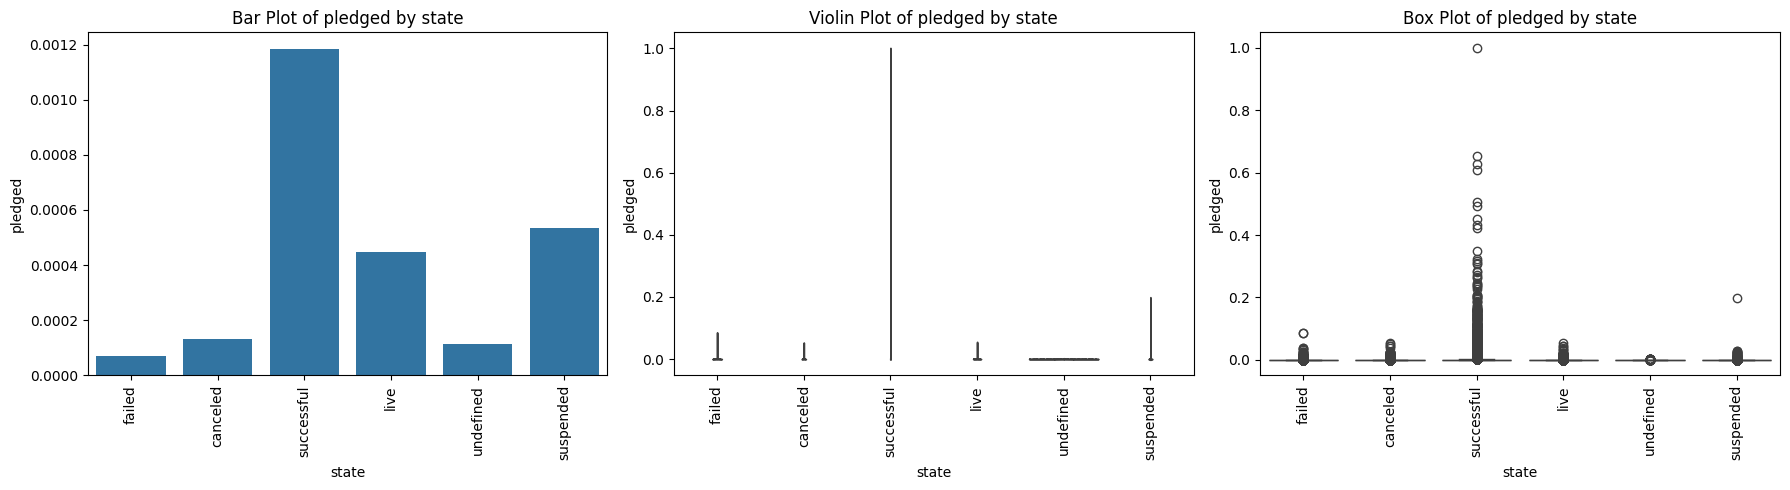

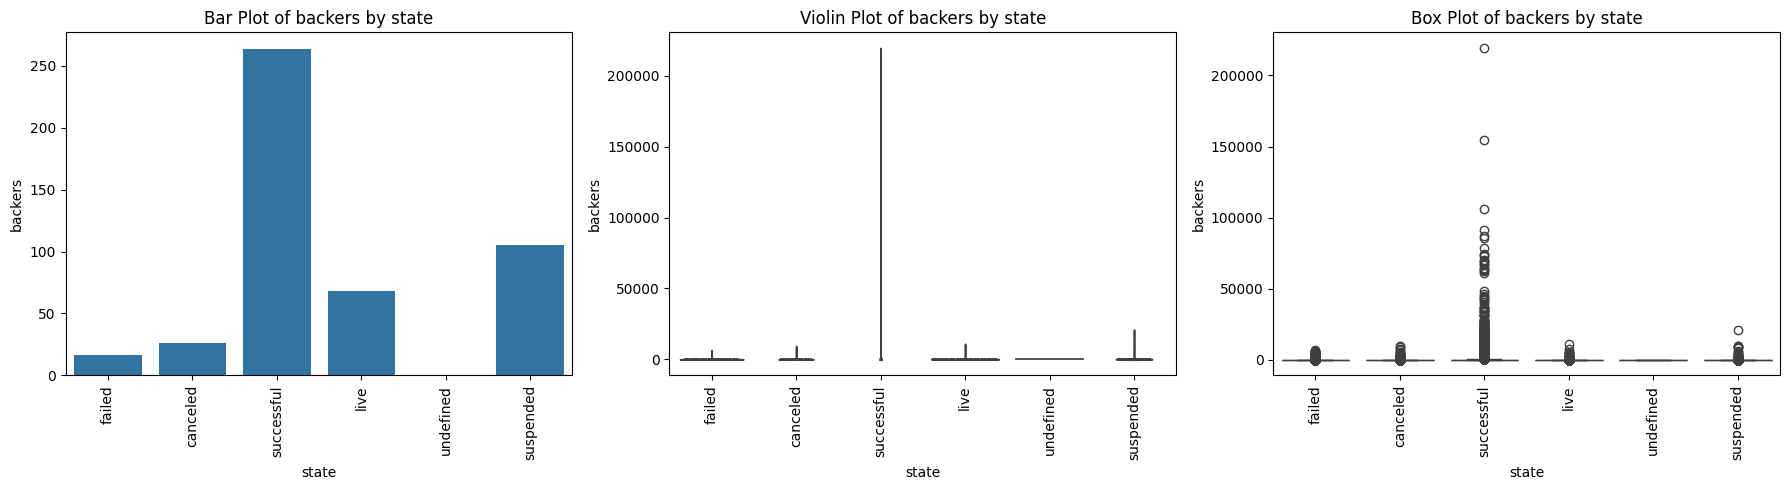

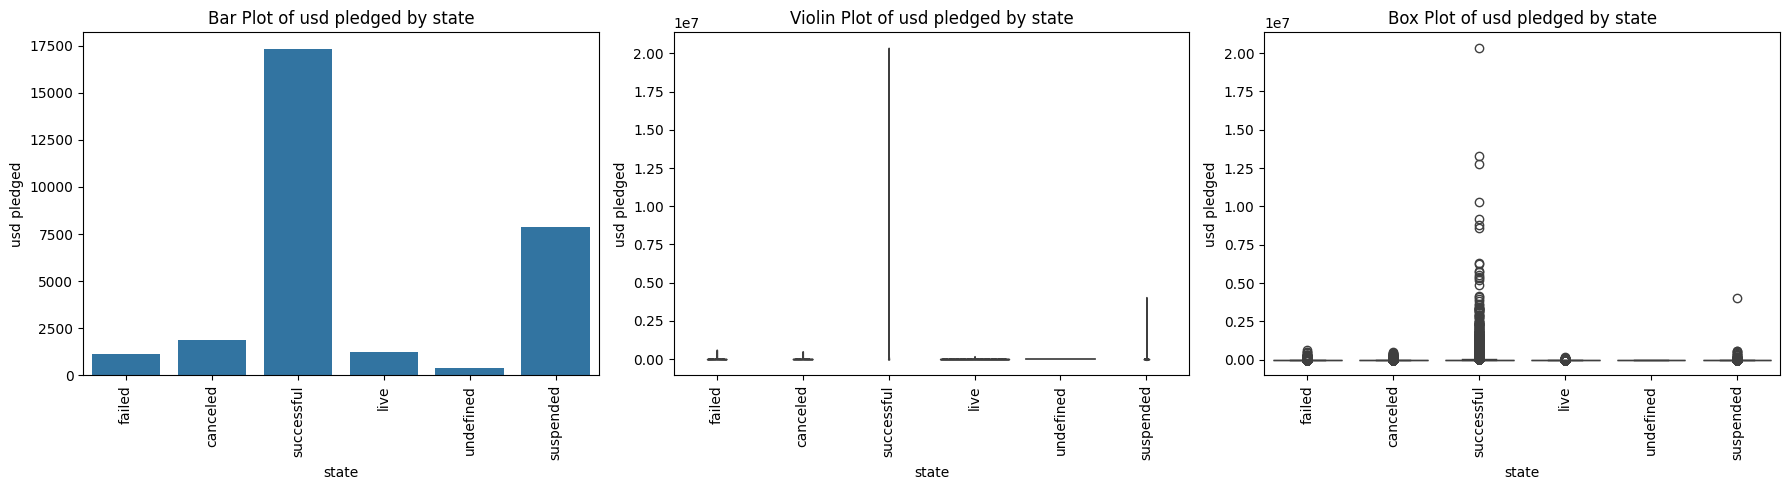

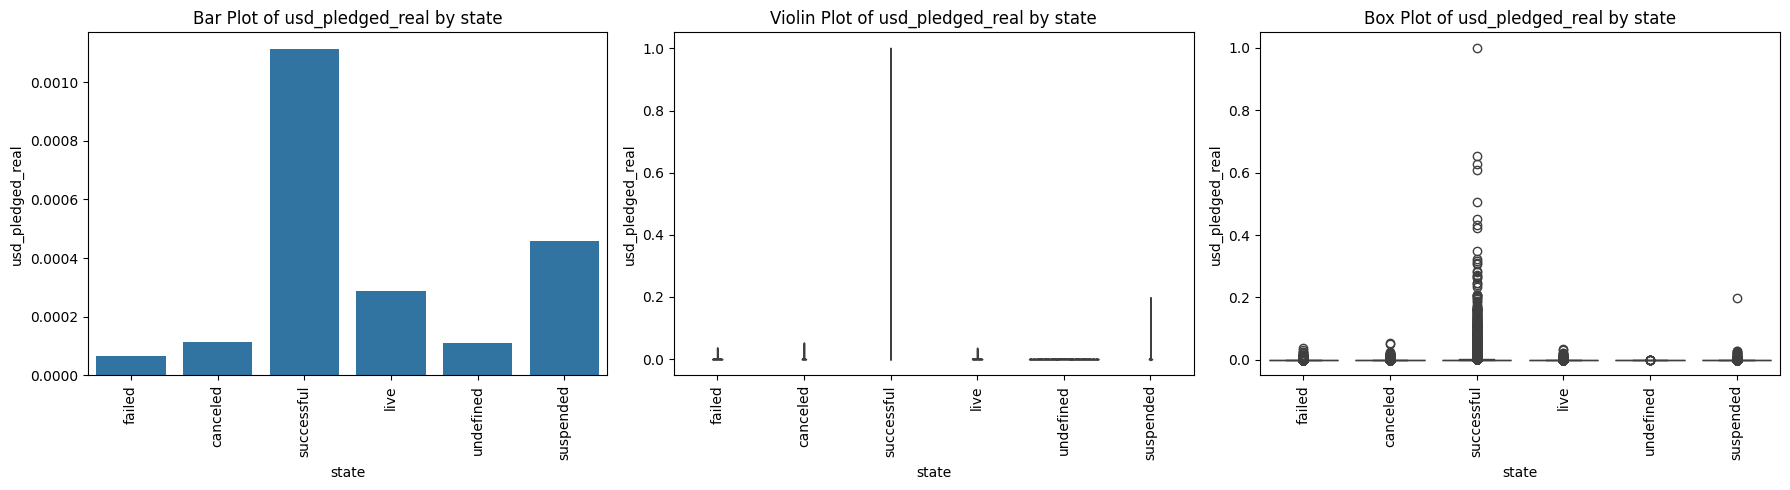

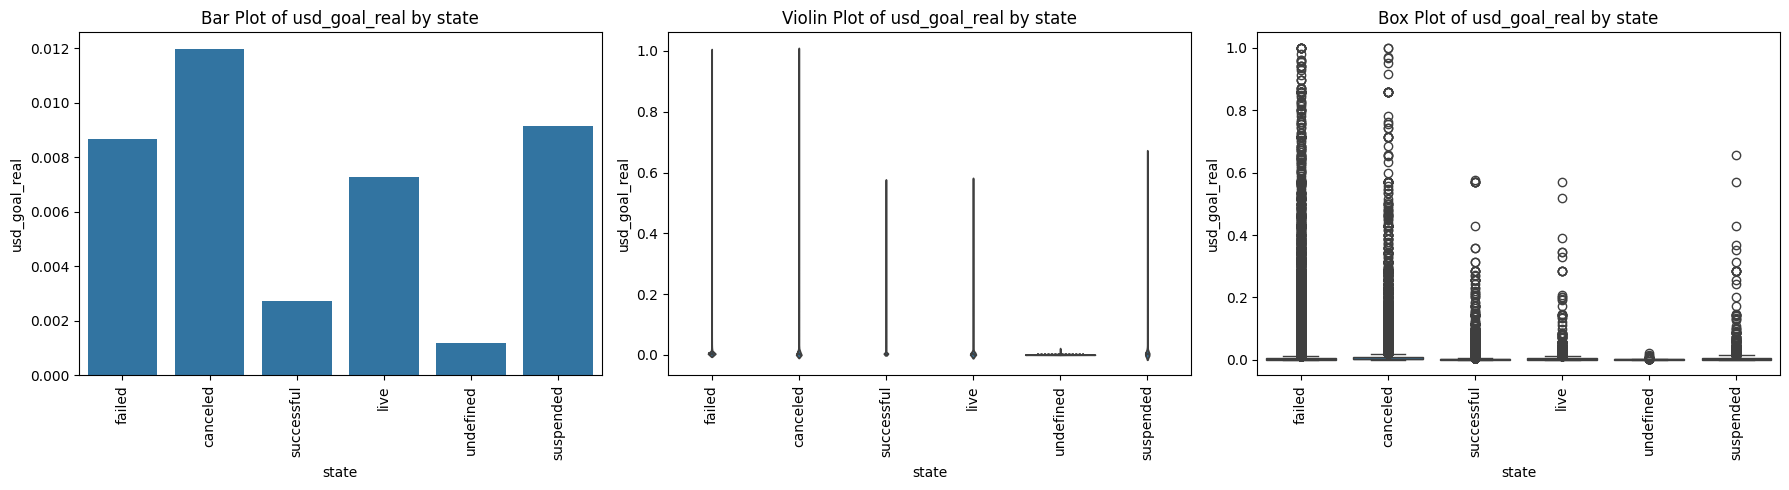

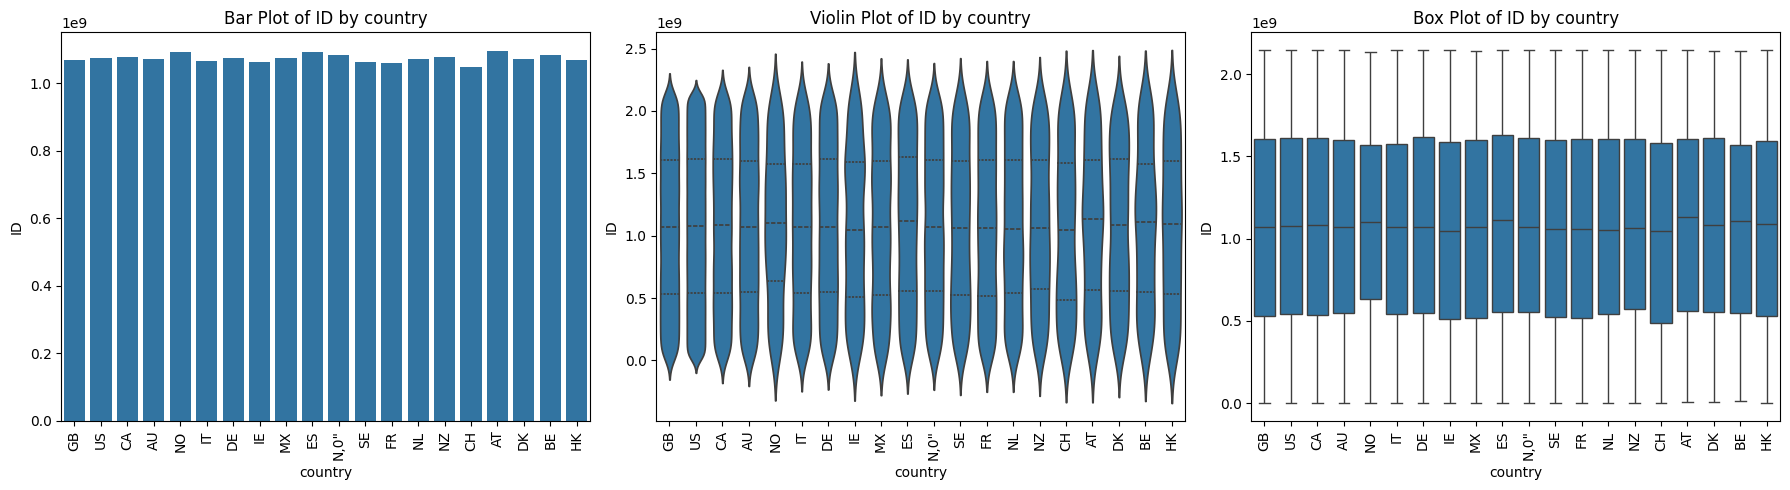

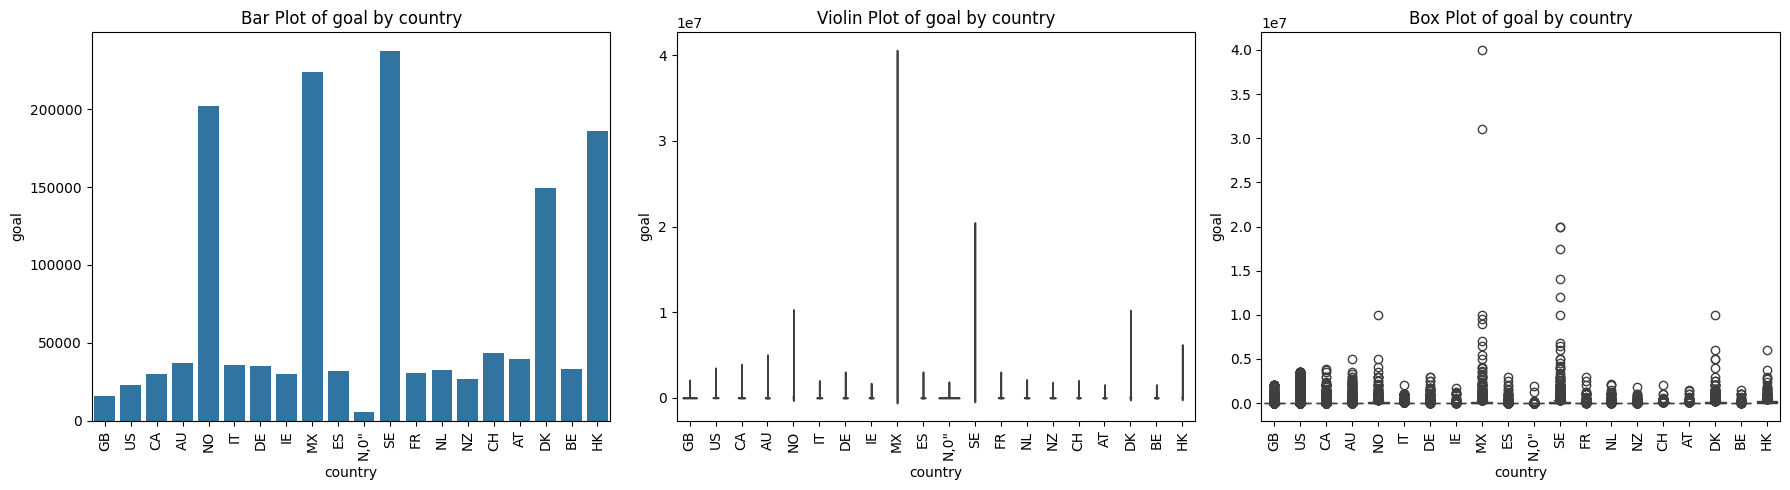

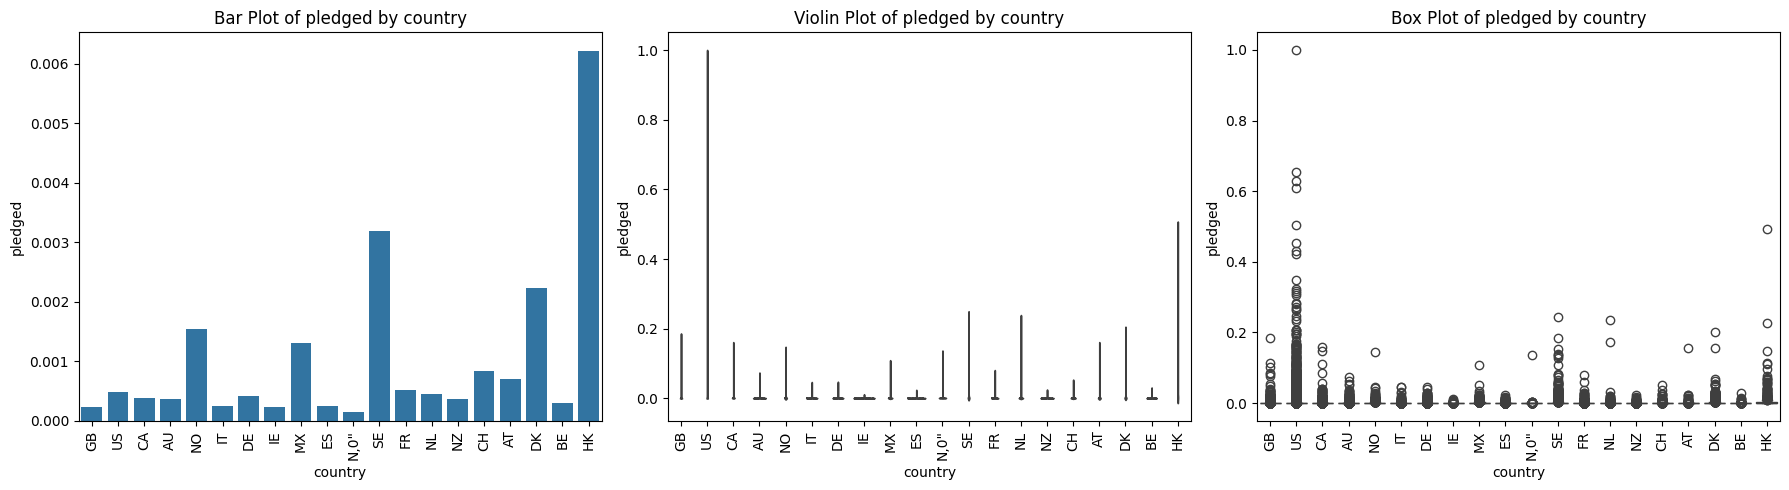

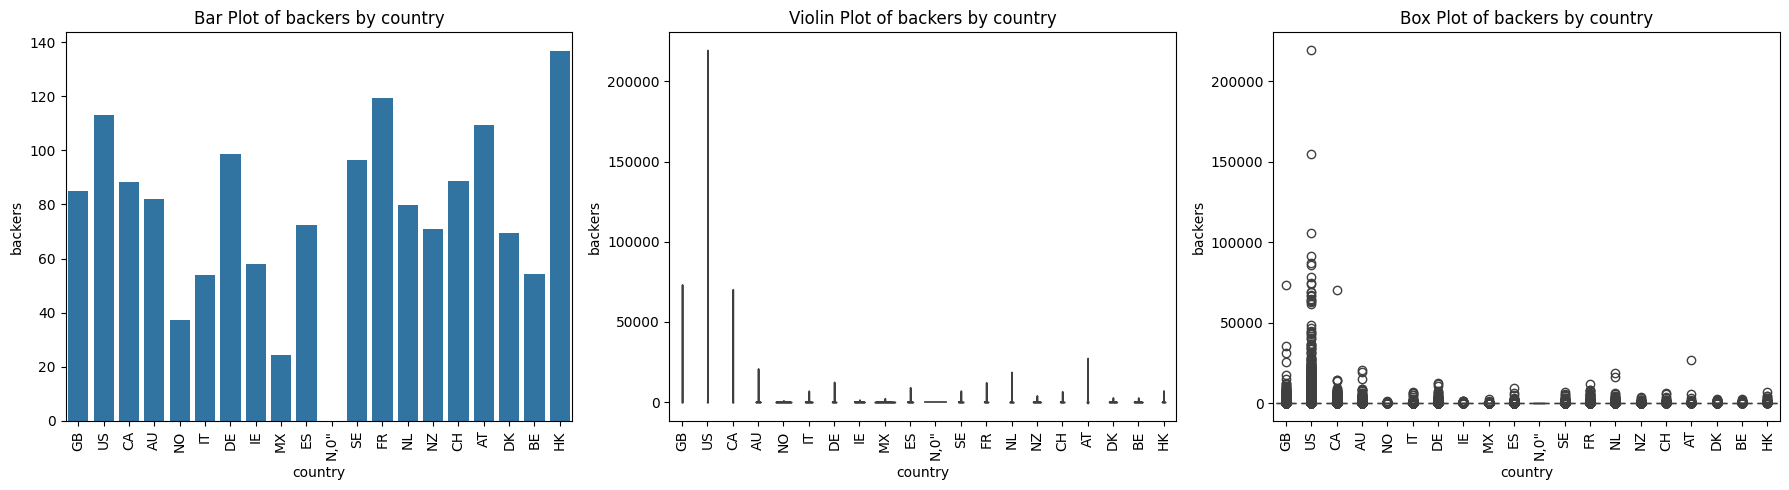

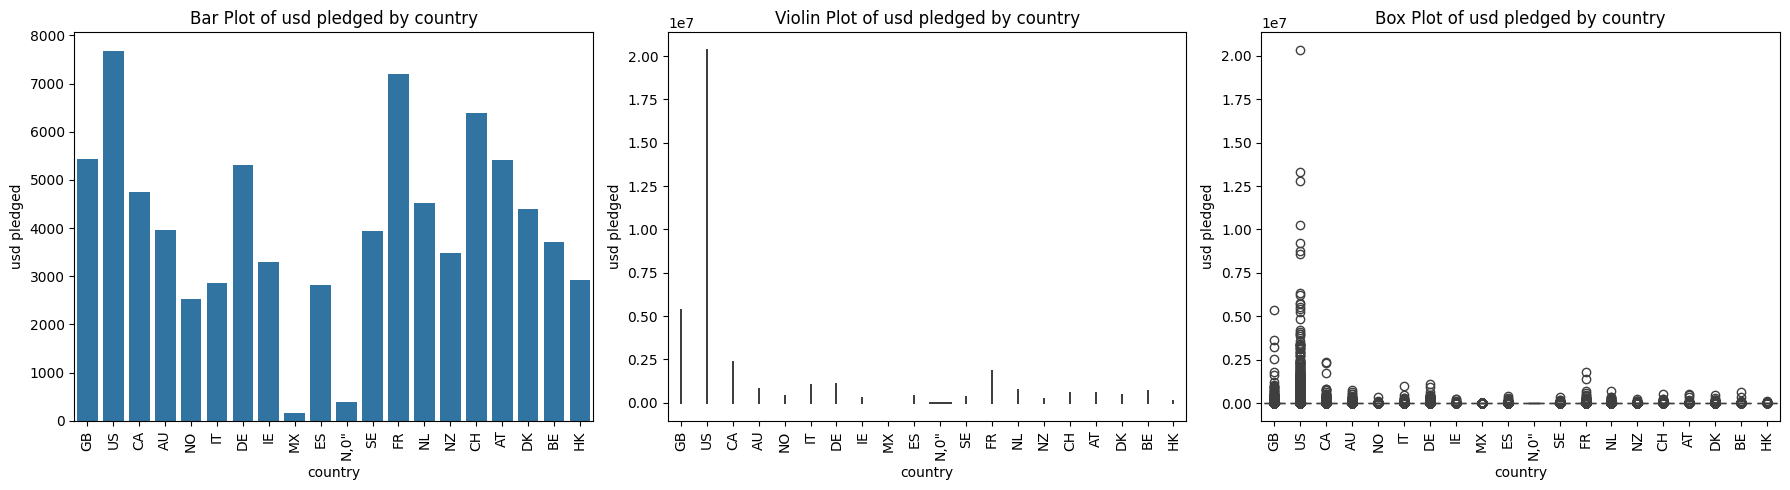

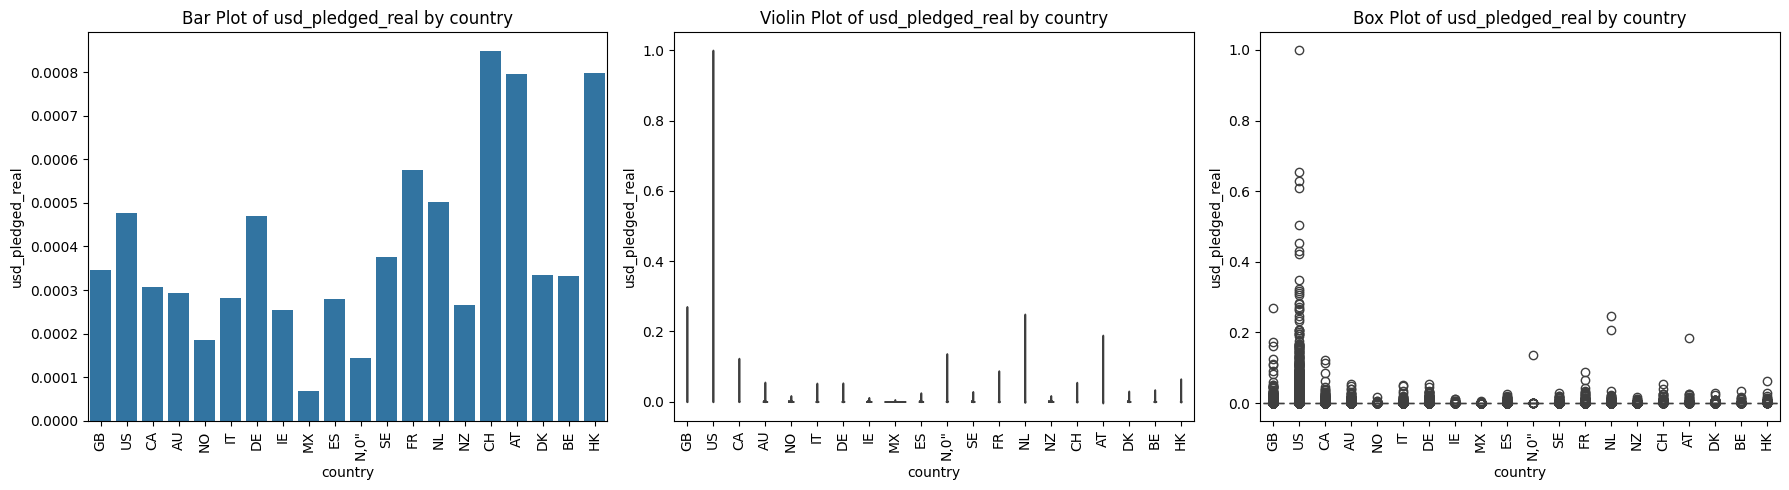

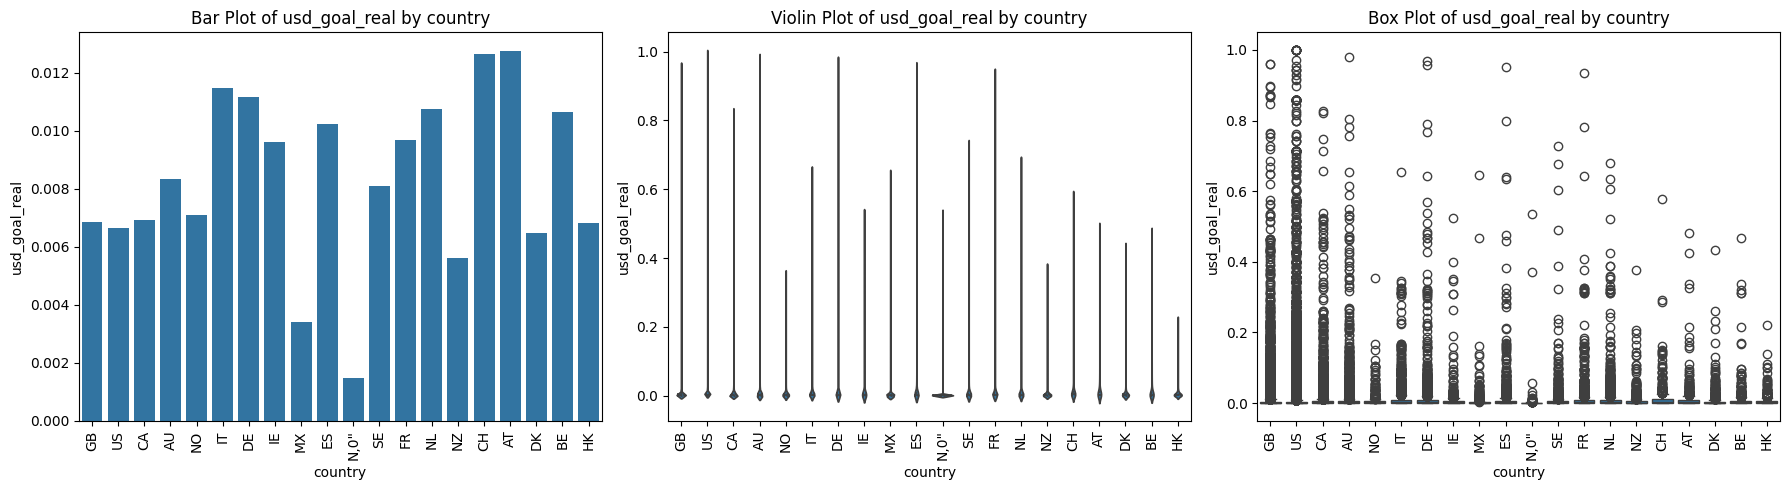

In [20]:
for cat_col in cat_cols:
    # Get top categories dynamically
    top_categories = df[cat_col].value_counts().index[:20]
    df_subset = df[df[cat_col].isin(top_categories)]

    for num_col in num_cols:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))

        # Bar plot
        sns.barplot(x=cat_col, y=num_col, data=df_subset, errorbar=None, ax=axes[0])
        axes[0].set_title(f"Bar Plot of {num_col} by {cat_col}")
        axes[0].tick_params(axis='x', rotation=90)

        # Violin plot
        sns.violinplot(x=cat_col, y=num_col, data=df_subset, ax=axes[1], inner='quartile', dodge=False)
        axes[1].set_title(f"Violin Plot of {num_col} by {cat_col}")
        axes[1].tick_params(axis='x', rotation=90)

        # Box plot
        sns.boxplot(x=cat_col, y=num_col, data=df_subset, ax=axes[2])
        axes[2].set_title(f"Box Plot of {num_col} by {cat_col}")
        axes[2].tick_params(axis='x', rotation=90)

        plt.tight_layout()
        plt.show()


###Multivariate Analysis

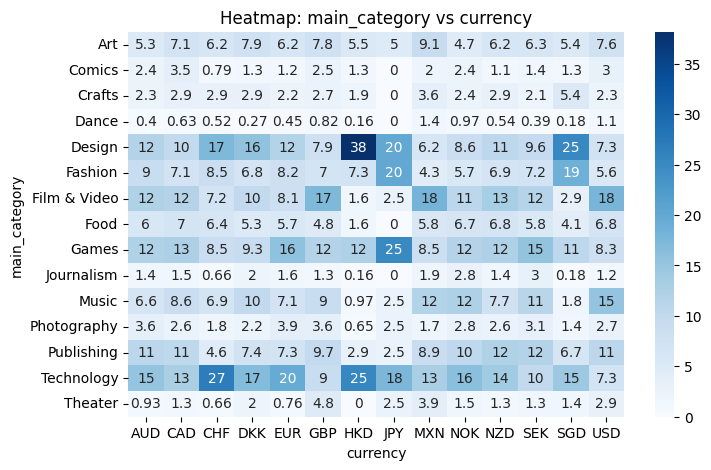

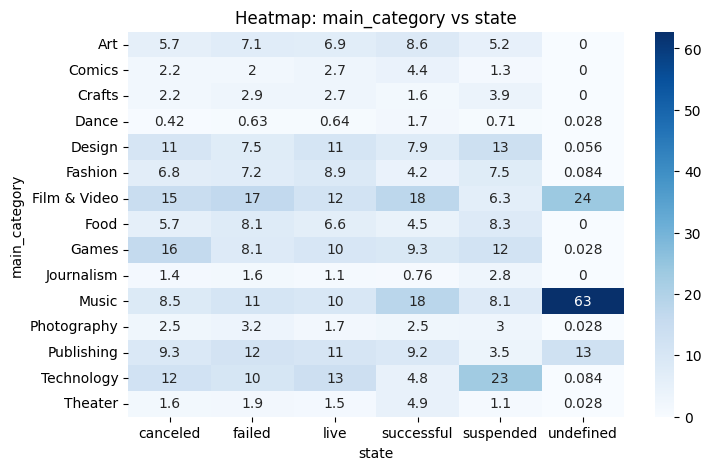

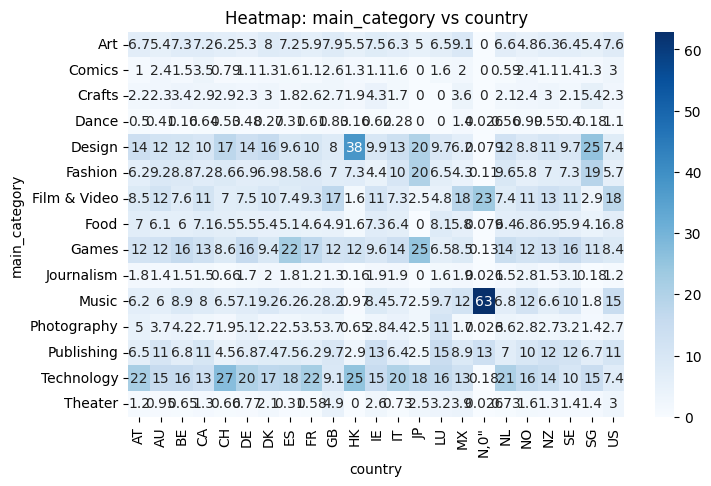

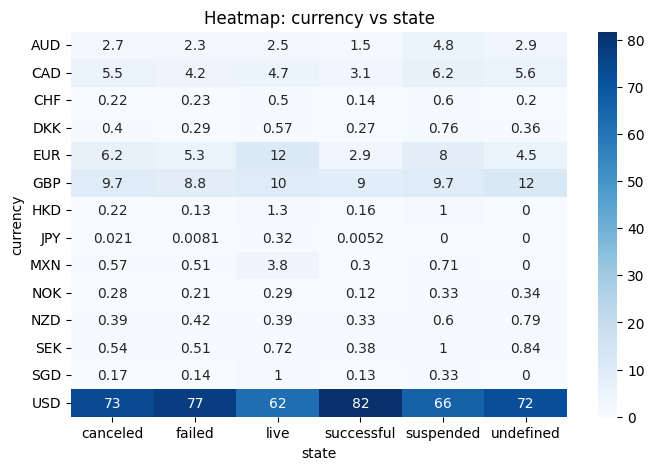

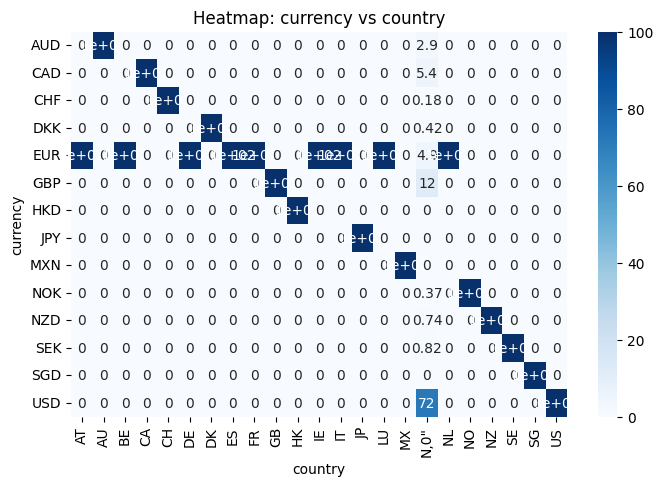

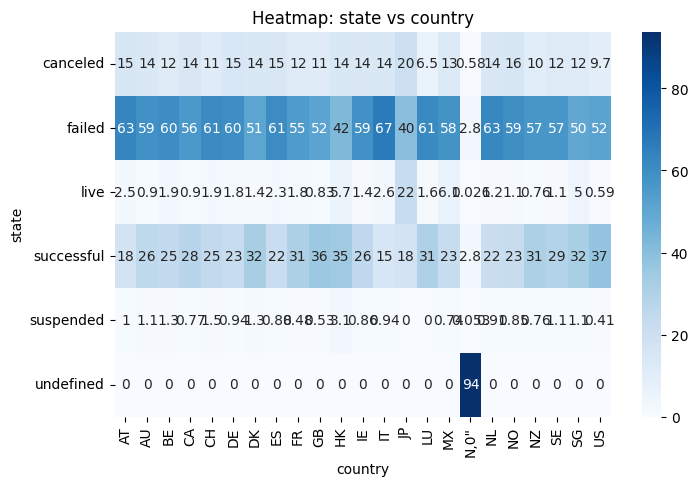

In [23]:
categorical_cols = ['main_category', 'currency', 'state', 'country']

for i in range(0, len(categorical_cols)):
  for j in range(i+1, len(categorical_cols)):
    if i != j:
      plt.figure(figsize=(8, 5))
      sns.heatmap(pd.crosstab(df[categorical_cols[i]], df[categorical_cols[j]], normalize='columns') * 100, annot=True, cmap='Blues')
      plt.title(f'Heatmap: {categorical_cols[i]} vs {categorical_cols[j]}')
      plt.show()

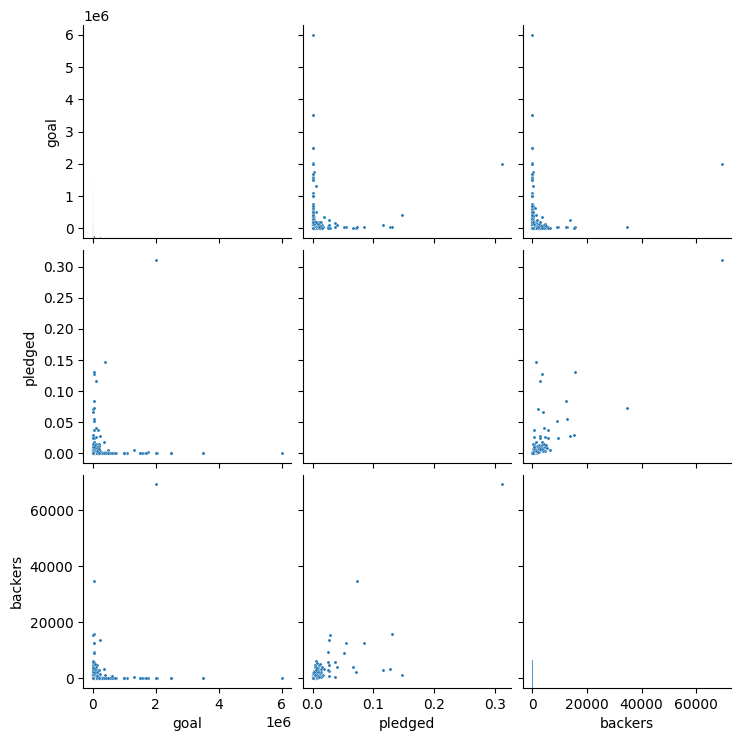

In [18]:
# Reduce dataset size for faster pair plot rendering
df_sampled = df.sample(n=7000, random_state=42)  # Adjust n based on performance needs

# Select only a few numerical columns with the highest correlation
selected_cols = ['goal', 'pledged', 'backers']  # Modify based on your analysis

# Generate the optimized pair plot
sns.pairplot(df_sampled[selected_cols], plot_kws={'s': 5})  # 's' controls point size
plt.show()


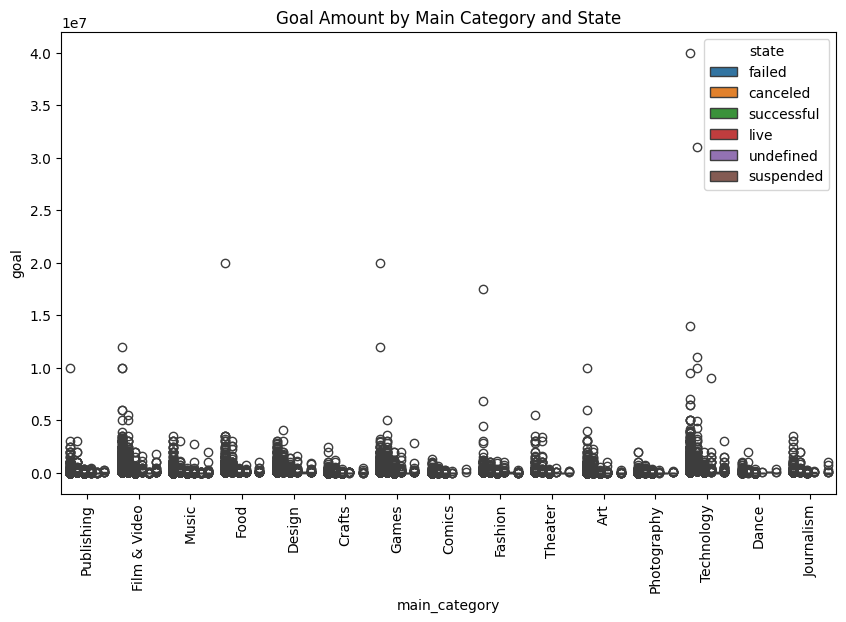

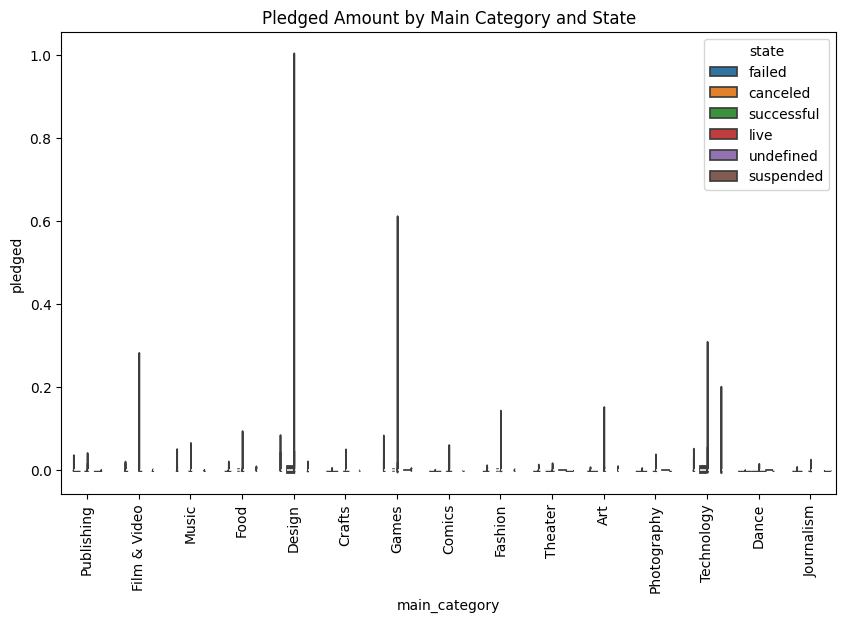

In [15]:
# Grouped comparisons to identify combined effects of multiple features
plt.figure(figsize=(10, 6))
sns.boxplot(x='main_category', y='goal', hue='state', data=df)
plt.xticks(rotation=90)
plt.title("Goal Amount by Main Category and State")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='main_category', y='pledged', hue='state', data=df, split=True)
plt.xticks(rotation=90)
plt.title("Pledged Amount by Main Category and State")
plt.show()

<Axes: xlabel='state', ylabel='country'>

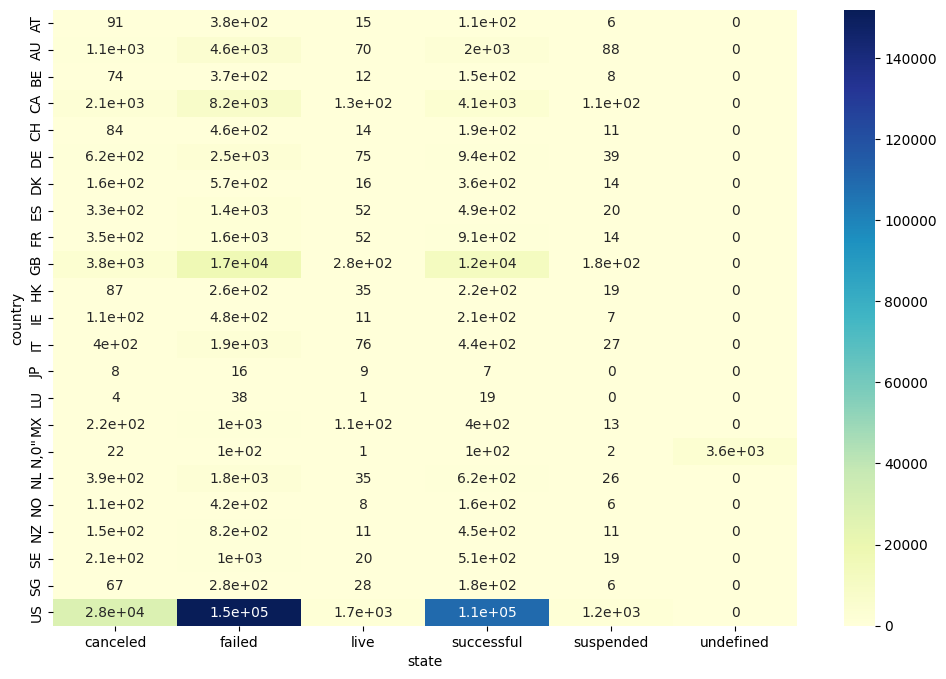

In [16]:
# Chi2 test
from scipy.stats import chi2_contingency

contigency= pd.crosstab(df['country'], df['state'])
contigency

contigency_pct = pd.crosstab(df['country'], df['state'], normalize='index')
contigency_pct

plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [17]:
# ANNOVA test

import pandas as pd
from scipy import stats

numerical_columns = ['usd_goal_real']
group_column = 'country'

anova_data = {col: [] for col in numerical_columns}
for country in df[group_column].unique():
    for col in numerical_columns:
        anova_data[col].append(df[df[group_column] == country][col].dropna().values)
anova_results = {col: stats.f_oneway(*anova_data[col]) for col in numerical_columns}

for col, result in anova_results.items():
    print(f'ANOVA results for {col}:')
    print(f'F-statistic: {result.statistic}, P-value: {result.pvalue}\n')

ANOVA results for usd_goal_real:
F-statistic: 24.39929888772965, P-value: 1.8183106615546736e-99

